In [62]:
import matplotlib.pyplot as plt
import numpy as np

from util.constants import Solver
from util.metrics import compute_cumulative_regret


def plot_regret_curves(algorithms, solvers, subset_size, colors, directory, num_arms=20):
    fig, ax = plt.subplots(len(solvers), len(subset_size), figsize=(40, 10), constrained_layout=True)
    for solver_index, solver in enumerate(solvers):
        for size_index, size in enumerate(subset_size):
            for index, algorithm in enumerate(algorithms):
                if num_arms == 20:
                    regret = np.load(f"{directory}//regret_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                else:
                    regret = np.load(f"{directory}//regret_{num_arms}_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg = compute_cumulative_regret(regret)
                label = f"{algorithm}"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast"
                if algorithm == "ThompsonSampling":
                    label = "TS"
                if algorithm == "ThompsonSamplingContextual":
                    label = "TSC"
                if algorithm == "IndependentSelfSparring":
                    label = "ISS"
                if algorithm == "IndependentSelfSparringContextual":
                    label = "ISSC"
                ax[solver_index, size_index].plot(np.log(np.mean(cum_reg, axis=0)), color=colors[index], label=label)
                # ax[solver_index, size_index].fill_between(
                #     range(len(cum_reg[0])), 
                #     np.log(np.mean(cum_reg, axis=0)-np.std(cum_reg, axis=0)/np.sqrt(len(cum_reg))), 
                #     np.log(np.mean(cum_reg, axis=0)+np.std(cum_reg, axis=0)/np.sqrt(len(cum_reg))), 
                #     alpha=0.2
                # )
                # ax[solver_index, size_index].legend(loc='center left', bbox_to_anchor=(1, 0.5))
                ax[solver_index, size_index].set_ylabel("Logarithmic Cumulative Regret")
                ax[solver_index, size_index].set_xlabel("Time")
                ax[solver_index, size_index].set_title(f"Dataset: {solver}, Subset Size: {size}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(f'Logarithmic Cumulative regrets for $n=${num_arms}', fontsize=20)
    plt.show()

    fig, ax = plt.subplots(len(solvers), len(subset_size), figsize=(40, 10), constrained_layout=True)
    for solver_index, solver in enumerate(solvers):
        for size_index, size in enumerate(subset_size):
            for index, algorithm in enumerate(algorithms):
                if num_arms == 20:
                    regret = np.load(f"{directory}//regret_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                else:
                    regret = np.load(f"{directory}//regret_{num_arms}_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg = compute_cumulative_regret(regret)
                label = f"{algorithm}"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast"
                if algorithm == "ThompsonSampling":
                    label = "TS"
                if algorithm == "ThompsonSamplingContextual":
                    label = "TSC"
                if algorithm == "IndependentSelfSparring":
                    label = "ISS"
                if algorithm == "IndependentSelfSparringContextual":
                    label = "ISSC"
                ax[solver_index, size_index].plot(np.mean(cum_reg, axis=0), color=colors[index], label=label)
                # ax[solver_index, size_index].fill_between(
                #     range(len(cum_reg[0])), 
                #     np.mean(cum_reg, axis=0)-np.std(cum_reg, axis=0)/np.sqrt(len(cum_reg)), 
                #     np.mean(cum_reg, axis=0)+np.std(cum_reg, axis=0)/np.sqrt(len(cum_reg)), 
                #     alpha=0.2
                # )
                # ax[solver_index, size_index].legend(loc='center left', bbox_to_anchor=(1, 0.5))
                ax[solver_index, size_index].set_ylabel("Cumulative Regret")
                ax[solver_index, size_index].set_xlabel("Time")
                ax[solver_index, size_index].set_title(f"Dataset: {solver}, Subset Size: {size}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(f'Cumulative regrets for $n=${num_arms}', fontsize=20)
    plt.show()  

def plot_execution_times(algorithms, solvers, subset_size, colors, directory, num_arms=20):
    fig, ax = plt.subplots(len(solvers), len(subset_size), figsize=(40, 10), constrained_layout=True)
    for solver_index, solver in enumerate(solvers):
        for size_index, size in enumerate(subset_size):
            for index, algorithm in enumerate(algorithms):
                label = f"{algorithm}"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast"
                if algorithm == "ThompsonSampling":
                    label = "TS"
                if algorithm == "ThompsonSamplingContextual":
                    label = "TSC"
                if algorithm == "IndependentSelfSparring":
                    label = "ISS"
                if algorithm == "IndependentSelfSparringContextual":
                    label = "ISSC"
                if num_arms == 20:
                    execution_time = np.load(f"{directory}//execution_time_{algorithm}_{solver}_{size}.npy")
                else:
                    execution_time = np.load(f"{directory}//execution_time_{num_arms}_{algorithm}_{solver}_{size}.npy")
                ax[solver_index, size_index].bar(x=algorithm, height=execution_time.mean(), color=colors[index], label=label)
                # ax[solver_index, size_index].legend(loc='center left', bbox_to_anchor=(1, 0.5))#legend(loc='center left', bbox_to_anchor=(1, 0.5)loc='center left', bbox_to_anchor=(1, 0.5))
                ax[solver_index, size_index].set_ylabel("Mean execution time (in seconds)")
                ax[solver_index, size_index].set_xlabel("Algorithms")
                ax[solver_index, size_index].set_xticklabels([])
                ax[solver_index, size_index].set_title(f"Dataset: {solver}, Subset Size: {size}")
            ax[solver_index, size_index].grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(f'Mean execution time in seconds for $n=${num_arms}', fontsize=20)
    plt.show()

In [92]:
def plot_regret_curves_single_solver(algorithms, solvers, subset_size, colors, directory, num_arms=20):
    fig, ax = plt.subplots(len(solvers), len(subset_size), figsize=(15, 6), constrained_layout=True)
    for solver_index, solver in enumerate(solvers):
        for size_index, size in enumerate(subset_size):
            for index, algorithm in enumerate(algorithms):
                if num_arms == 20:
                    regret = np.load(f"{directory}//regret_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                else:
                    regret = np.load(f"{directory}//regret_{num_arms}_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg = compute_cumulative_regret(regret)
                label = f"{algorithm}"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast"
                if algorithm == "ThompsonSampling":
                    label = "TS"
                if algorithm == "ThompsonSamplingContextual":
                    label = "TSC"
                if algorithm == "IndependentSelfSparring":
                    label = "ISS"
                if algorithm == "IndependentSelfSparringContextual":
                    label = "ISSC"
                ax[size_index].plot(np.log(np.mean(cum_reg, axis=0)), color=colors[index], label=label)
                # ax[size_index].fill_between(
                #     range(len(cum_reg[0])), 
                #     np.log(np.mean(cum_reg, axis=0)-np.std(cum_reg, axis=0)/np.sqrt(len(cum_reg))), 
                #     np.log(np.mean(cum_reg, axis=0)+np.std(cum_reg, axis=0)/np.sqrt(len(cum_reg))), 
                #     alpha=0.2
                # )
                # ax[size_index].legend(loc='center left', bbox_to_anchor=(1, 0.5))
                ax[size_index].set_ylabel("Logarithmic Cumulative Regret")
                ax[size_index].set_xlabel("Time")
                ax[size_index].set_title(f"Dataset: {solver}, Subset Size: {size}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(f'Logarithmic Cumulative regrets for $n=${num_arms}', fontsize=20)
    plt.show()

# Framework v1

## Plot regrets with N = 20 (Final)

C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\1501398534.py:31: RuntimeWarning: divide by zero encountered in log
  ax[solver_index, size_index].plot(np.log(np.mean(cum_reg, axis=0)), color=colors[index], label=label)


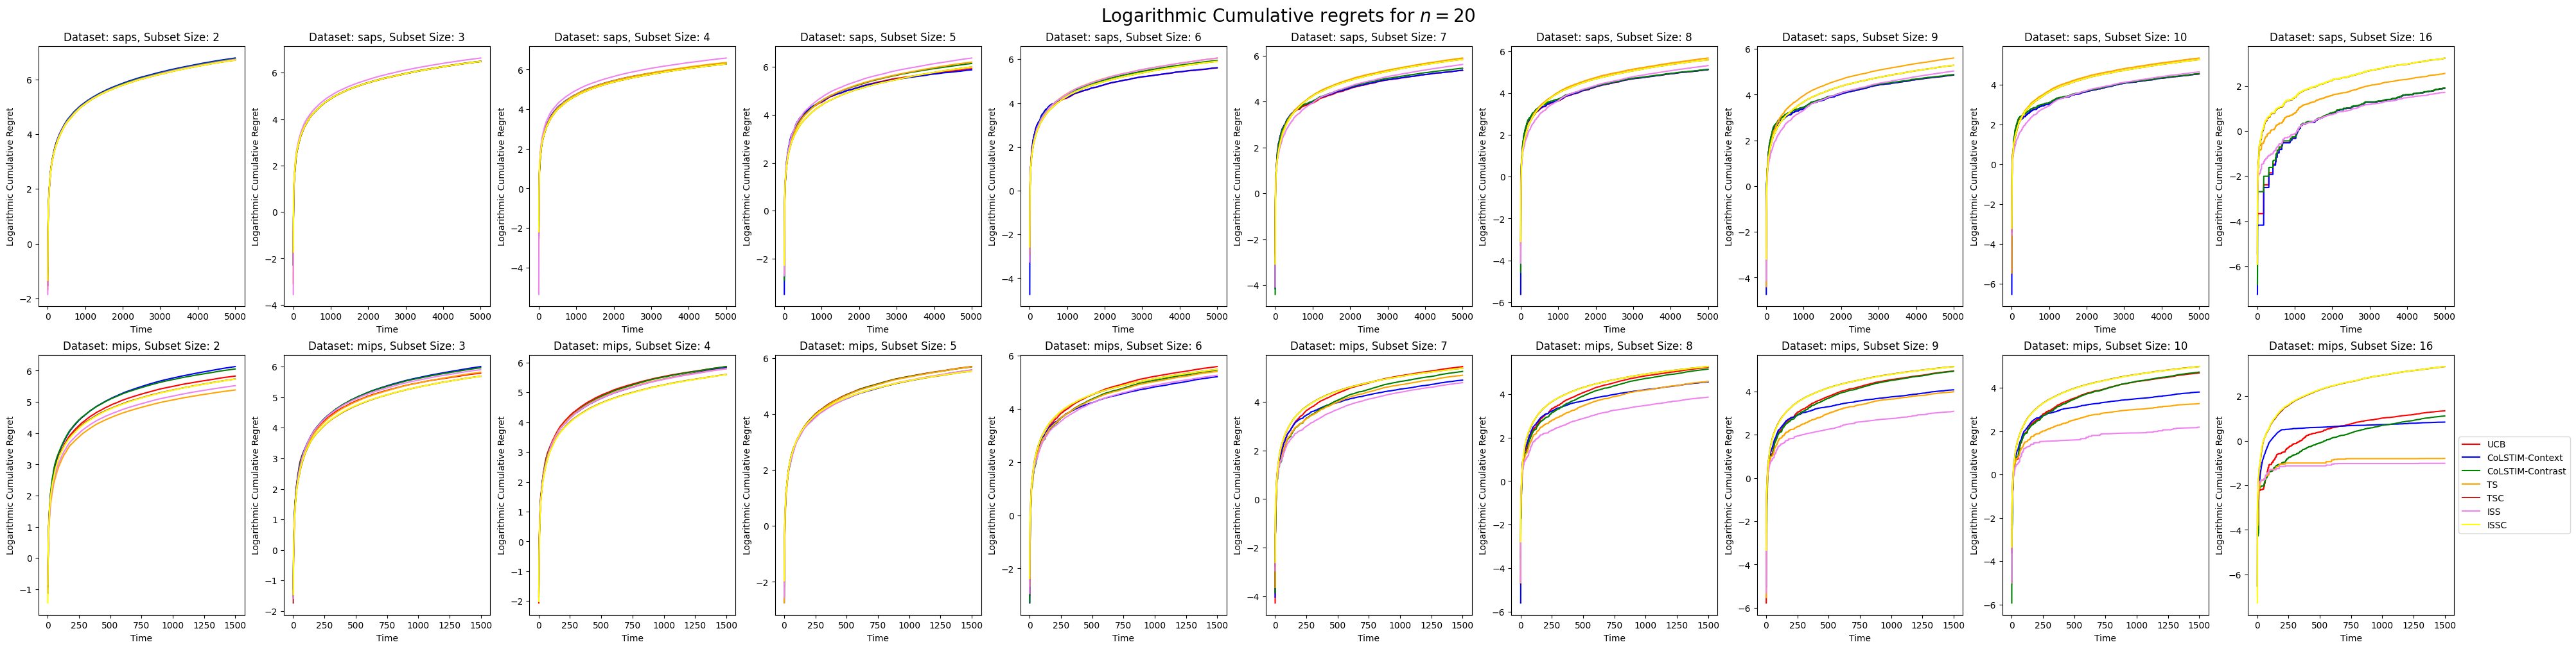

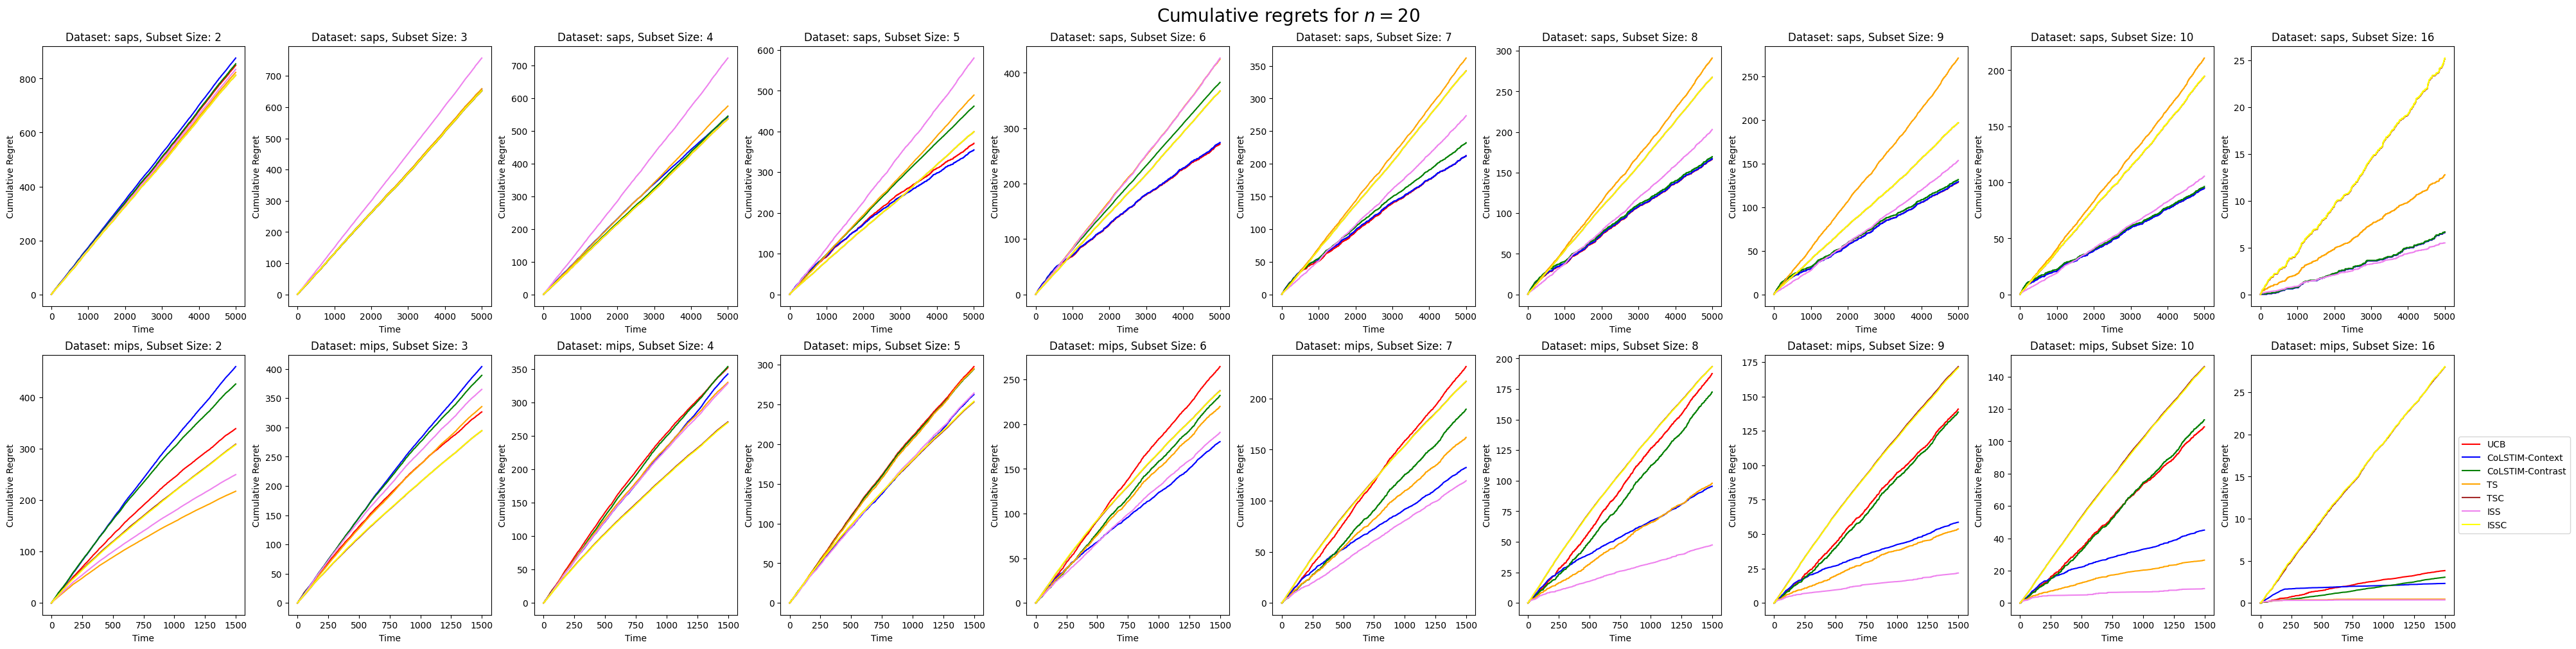

In [42]:
  
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
    "ThompsonSampling",
    "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    "IndependentSelfSparringContextual"
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 16]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory = "Noctua_2_Results\Regret_Framework_v1"
plot_regret_curves(algorithms, solvers, subset_size, colors, directory)

## Plot log cumul regret for MIPS, N = 20, $k = \{9, 10, 16\}$

C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\856995436.py:24: RuntimeWarning: divide by zero encountered in log
  ax[size_index].plot(np.log(np.mean(cum_reg, axis=0)), color=colors[index], label=label)


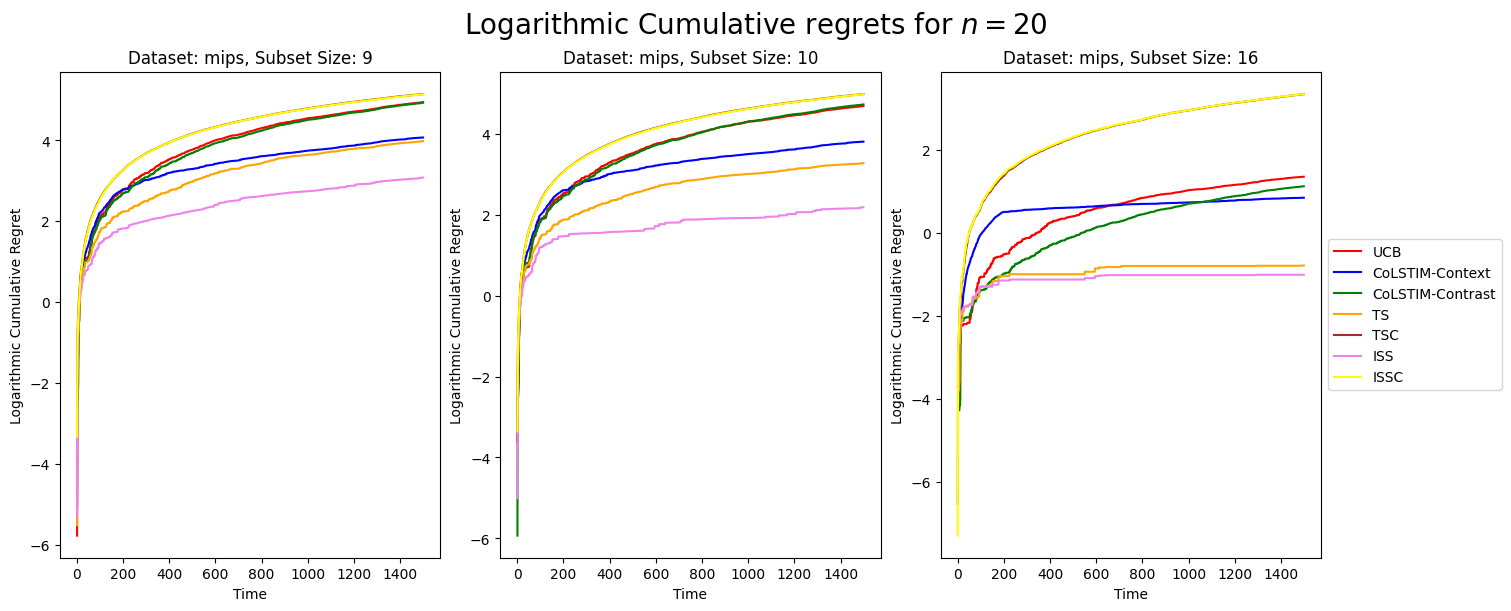

In [93]:
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
    "ThompsonSampling",
    "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    "IndependentSelfSparringContextual"
]
solvers = ["mips"]
subset_size = [9, 10, 16]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory = "Noctua_2_Results\Regret_Framework_v1"
plot_regret_curves_single_solver(algorithms, solvers, subset_size, colors, directory)

## Plot execution times with N = 20 (final)

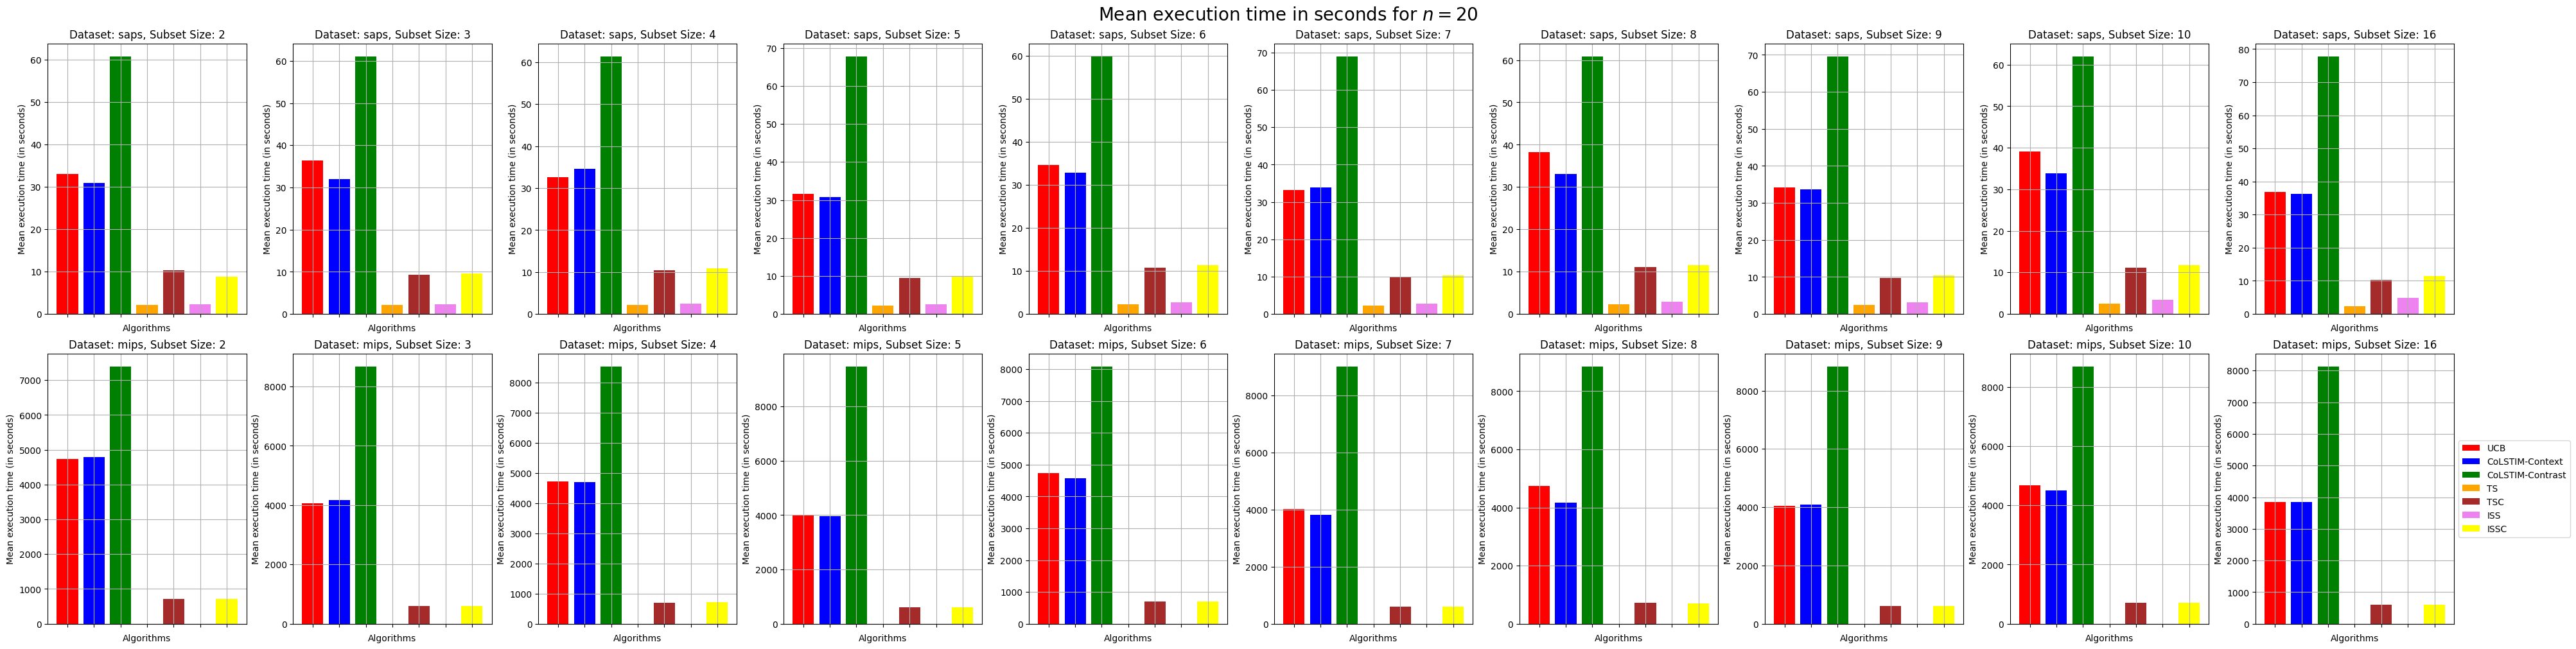

In [63]:
  
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
    "ThompsonSampling",
    "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    "IndependentSelfSparringContextual"
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 16]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory = "Noctua_2_Results\Execution_Time_Framework_v1"
plot_execution_times(algorithms, solvers, subset_size, colors, directory)

### Execution times for TS, TSC, ISS and ISSC

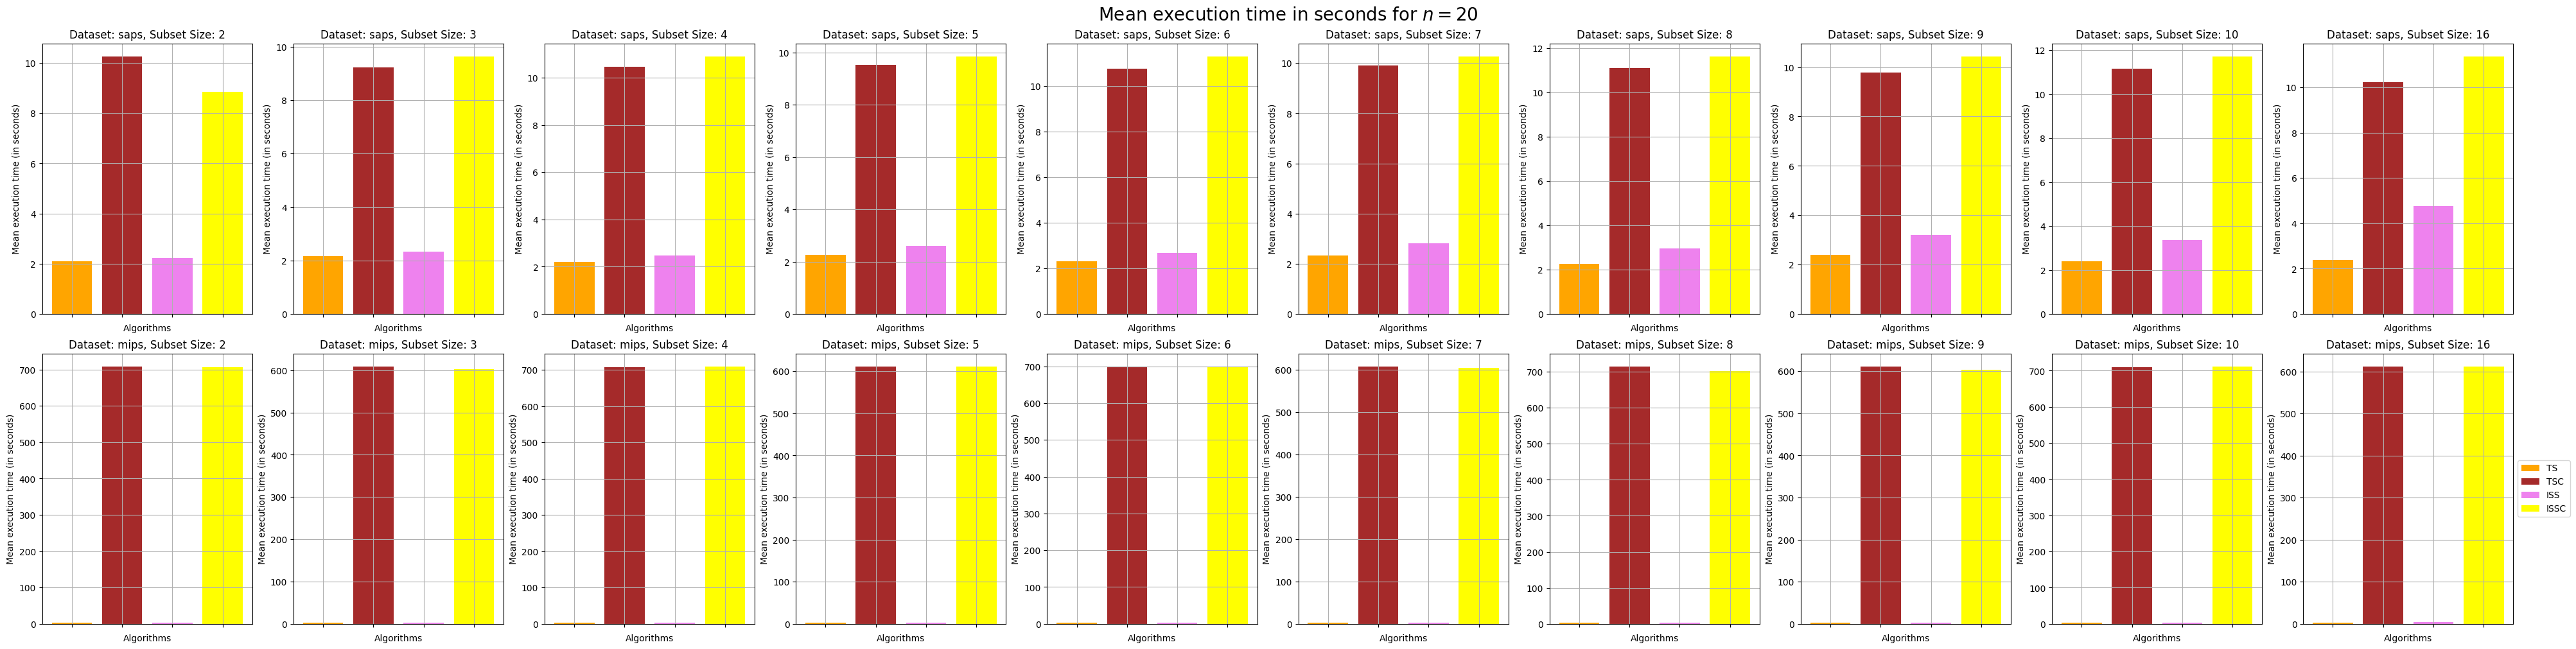

In [64]:
  
algorithms = [
    "ThompsonSampling",
    "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    "IndependentSelfSparringContextual"
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 16]
colors = ["orange", "brown", "violet", "yellow"]
directory = "Noctua_2_Results\Execution_Time_Framework_v1"
plot_execution_times(algorithms, solvers, subset_size, colors, directory)

### Execution times TSS and ISS

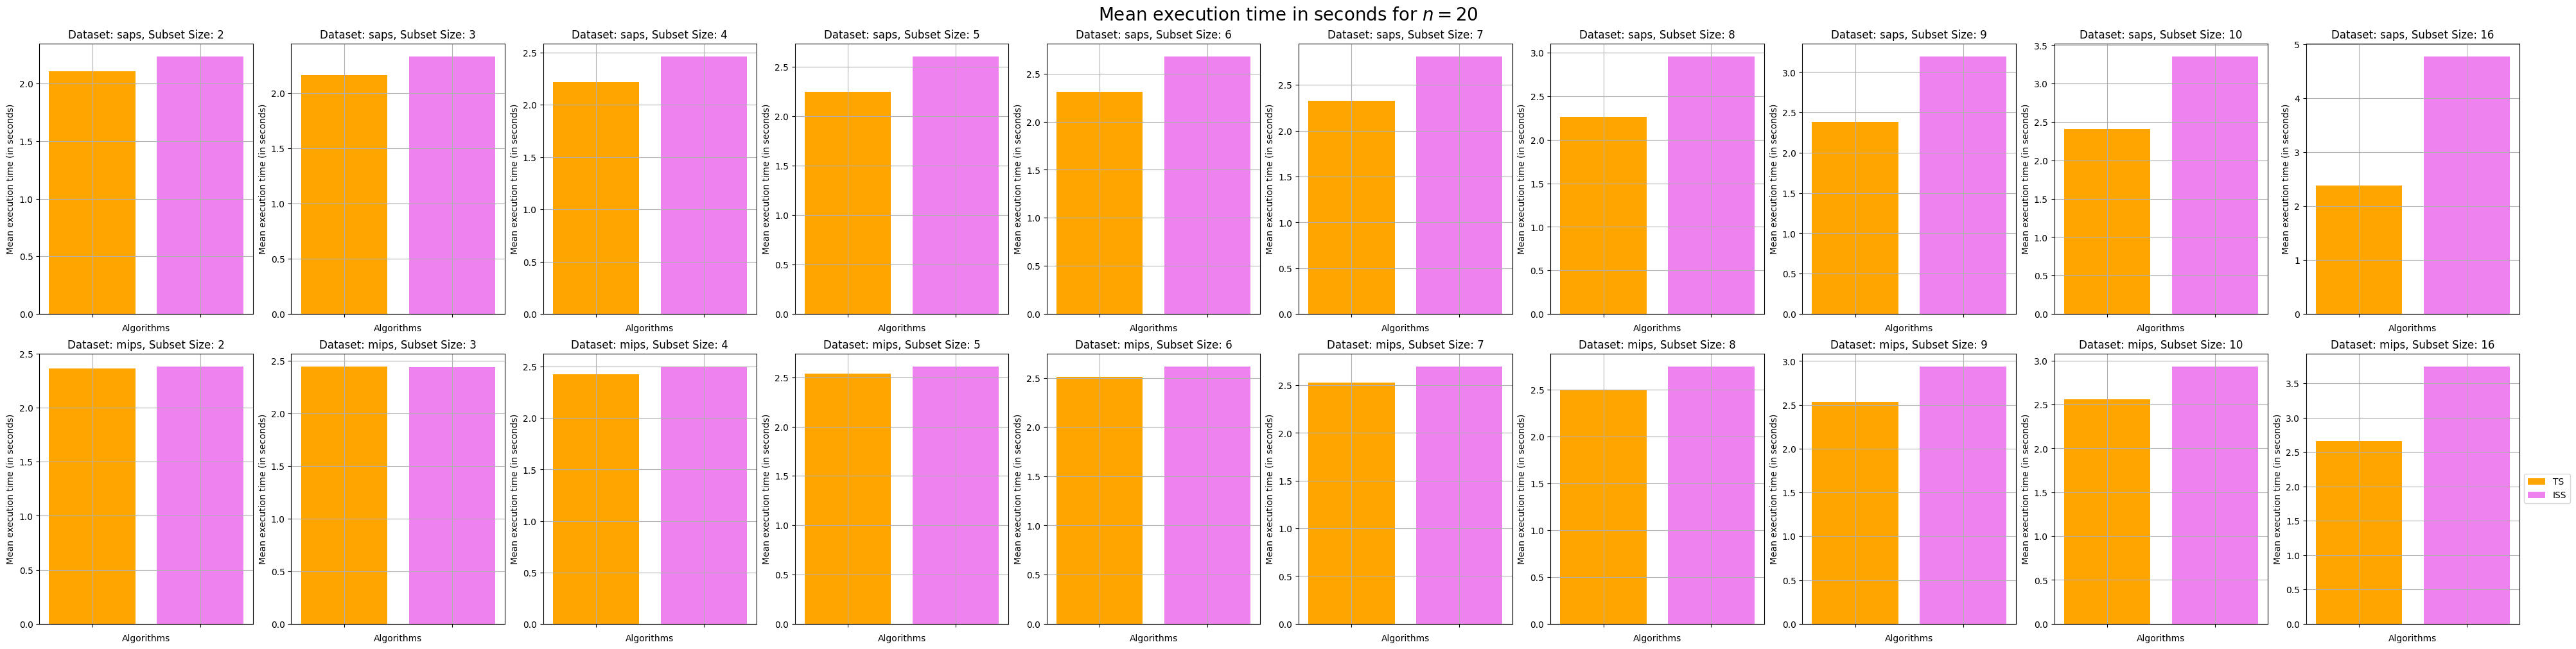

In [65]:
  
algorithms = [
    "ThompsonSampling",
    # "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    # "IndependentSelfSparringContextual"
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 16]
colors = ["orange", "violet"]
directory = "Noctua_2_Results\Execution_Time_Framework_v1"
plot_execution_times(algorithms, solvers, subset_size, colors, directory)

## Plot regrets with N = 15 (Final)

C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\1501398534.py:31: RuntimeWarning: divide by zero encountered in log
  ax[solver_index, size_index].plot(np.log(np.mean(cum_reg, axis=0)), color=colors[index], label=label)


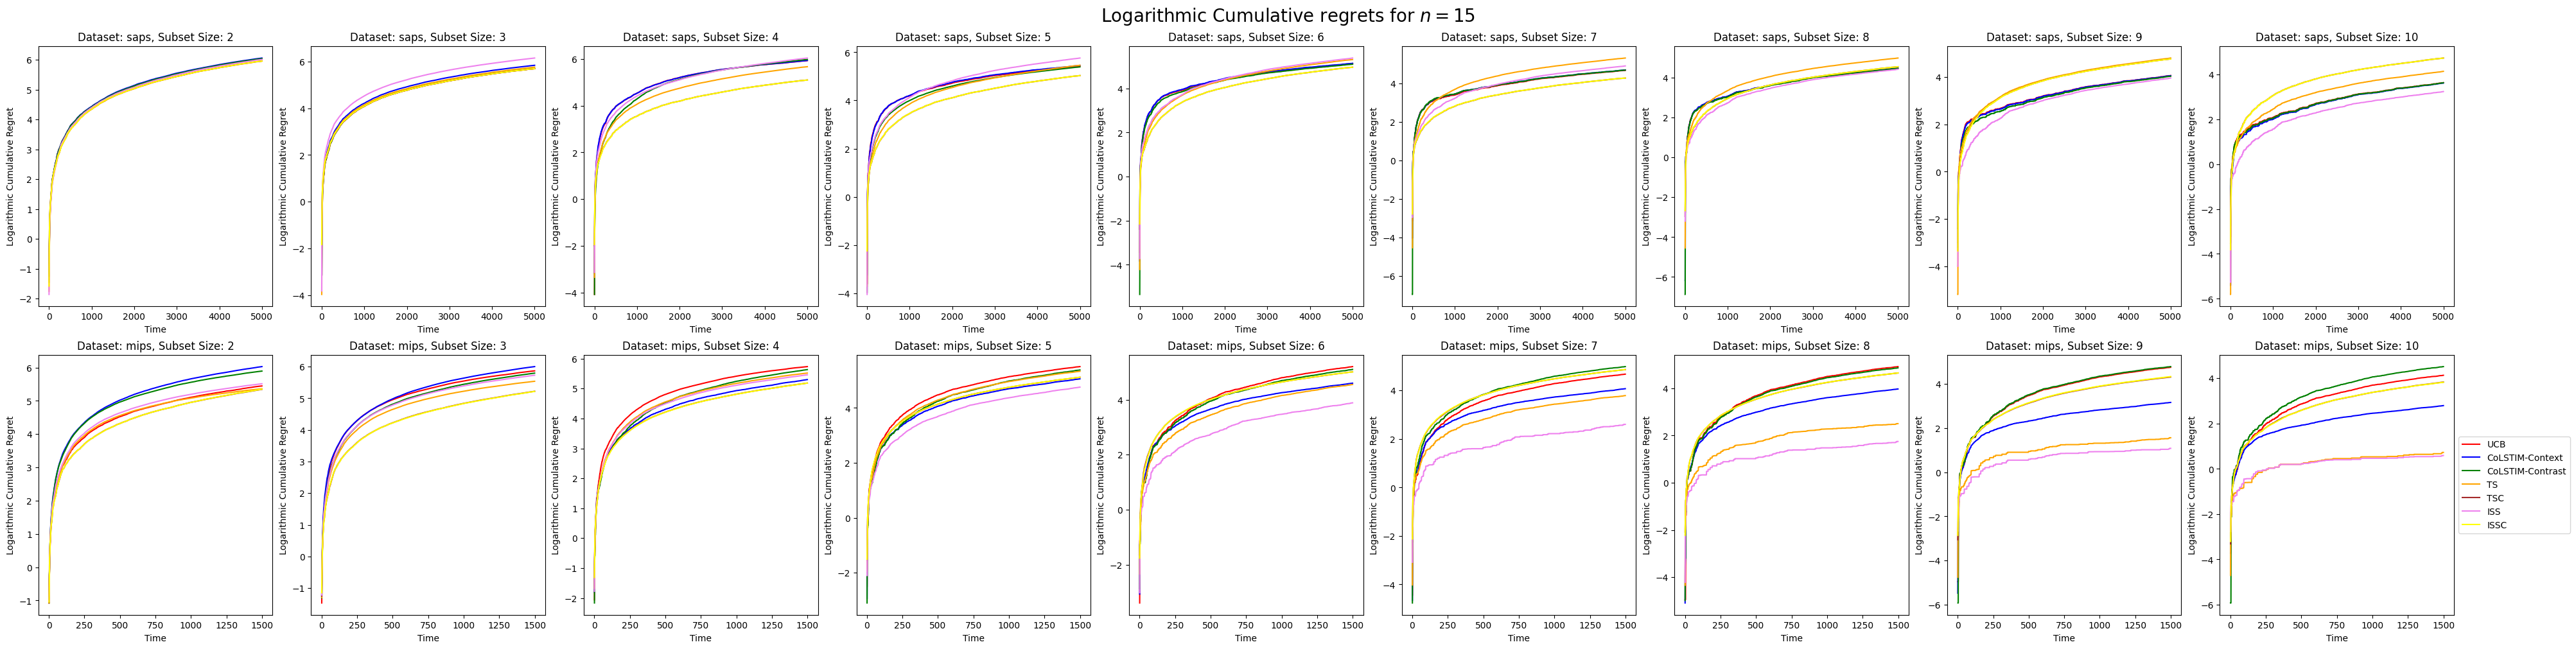

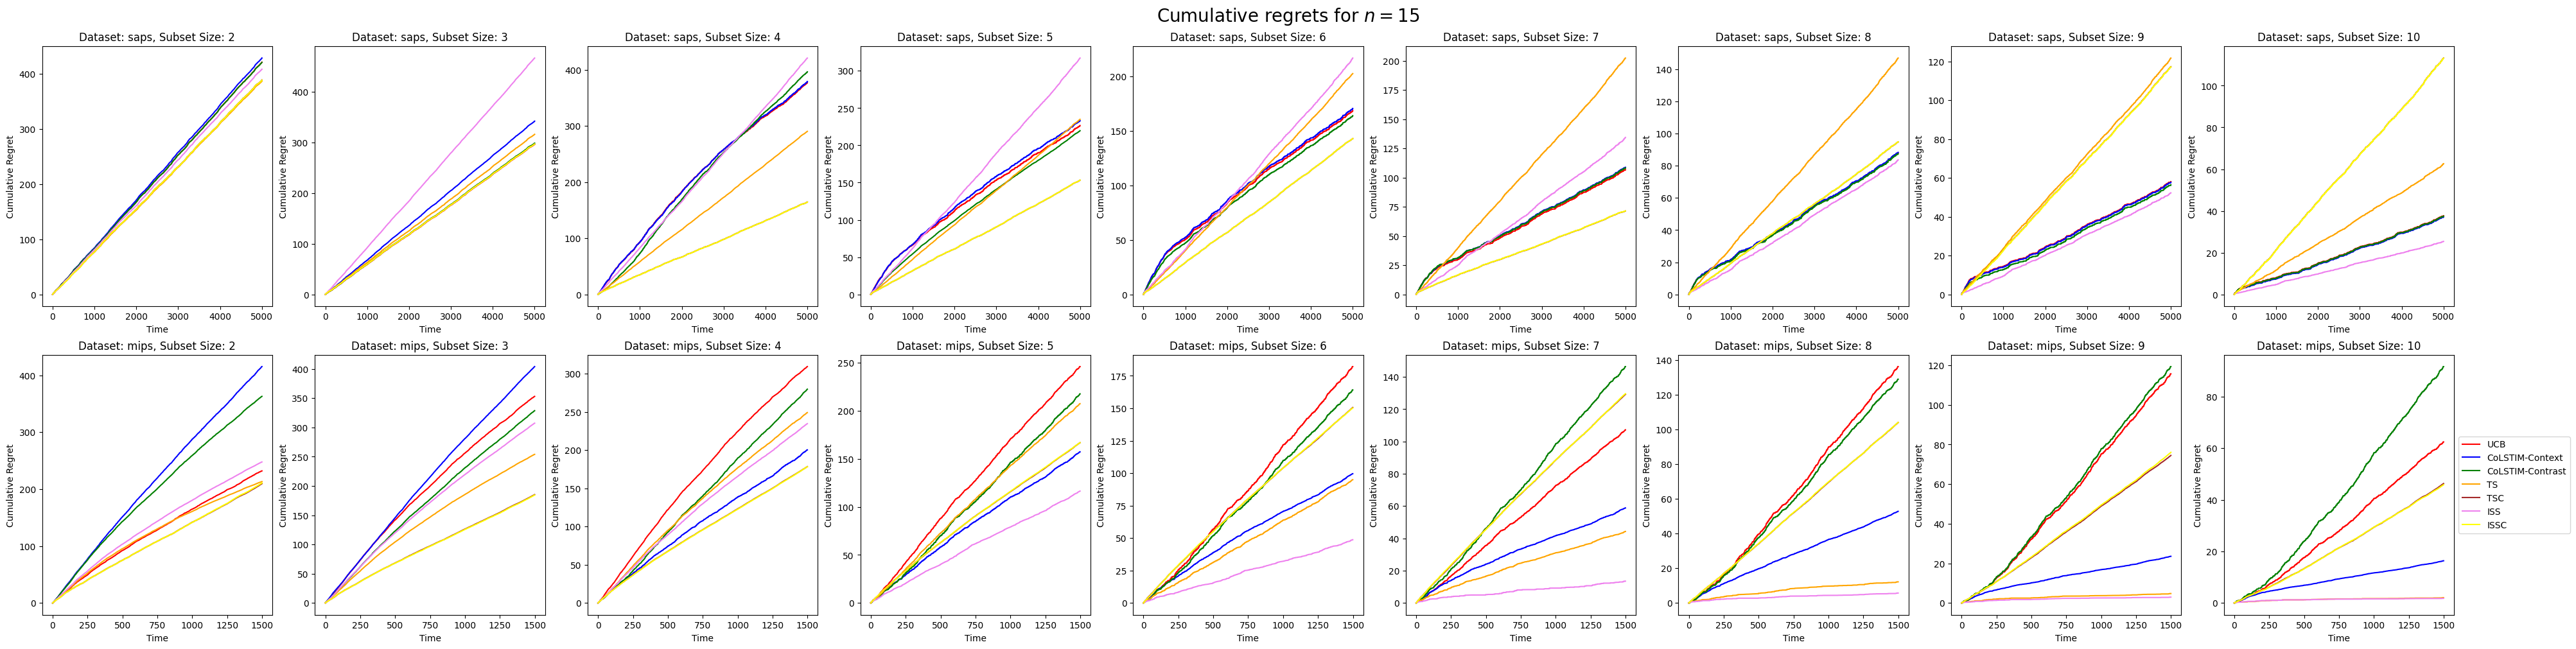

In [46]:
  
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
    "ThompsonSampling",
    "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    "IndependentSelfSparringContextual"
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory = "Noctua_2_Results/Regret_Framework_v1"
plot_regret_curves(algorithms, solvers, subset_size, colors, directory, num_arms=15)

## Plot log cumul regret for MIPS, N = 15, $k = \{8, 9, 10\}$

C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\856995436.py:24: RuntimeWarning: divide by zero encountered in log
  ax[size_index].plot(np.log(np.mean(cum_reg, axis=0)), color=colors[index], label=label)


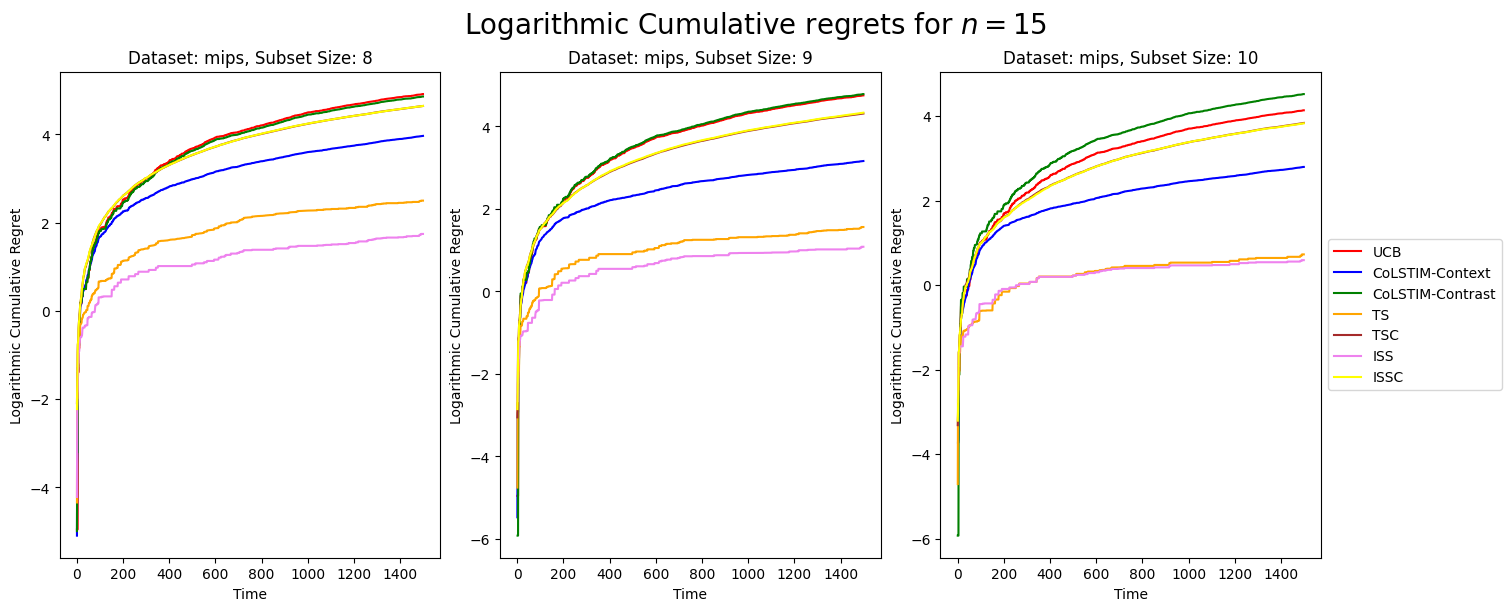

In [96]:
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
    "ThompsonSampling",
    "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    "IndependentSelfSparringContextual"
]
solvers = ["mips"]
subset_size = [8, 9, 10]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory = "Noctua_2_Results\Regret_Framework_v1"
plot_regret_curves_single_solver(algorithms, solvers, subset_size, colors, directory, num_arms=15)

## Plot execution times with N = 15 (final)

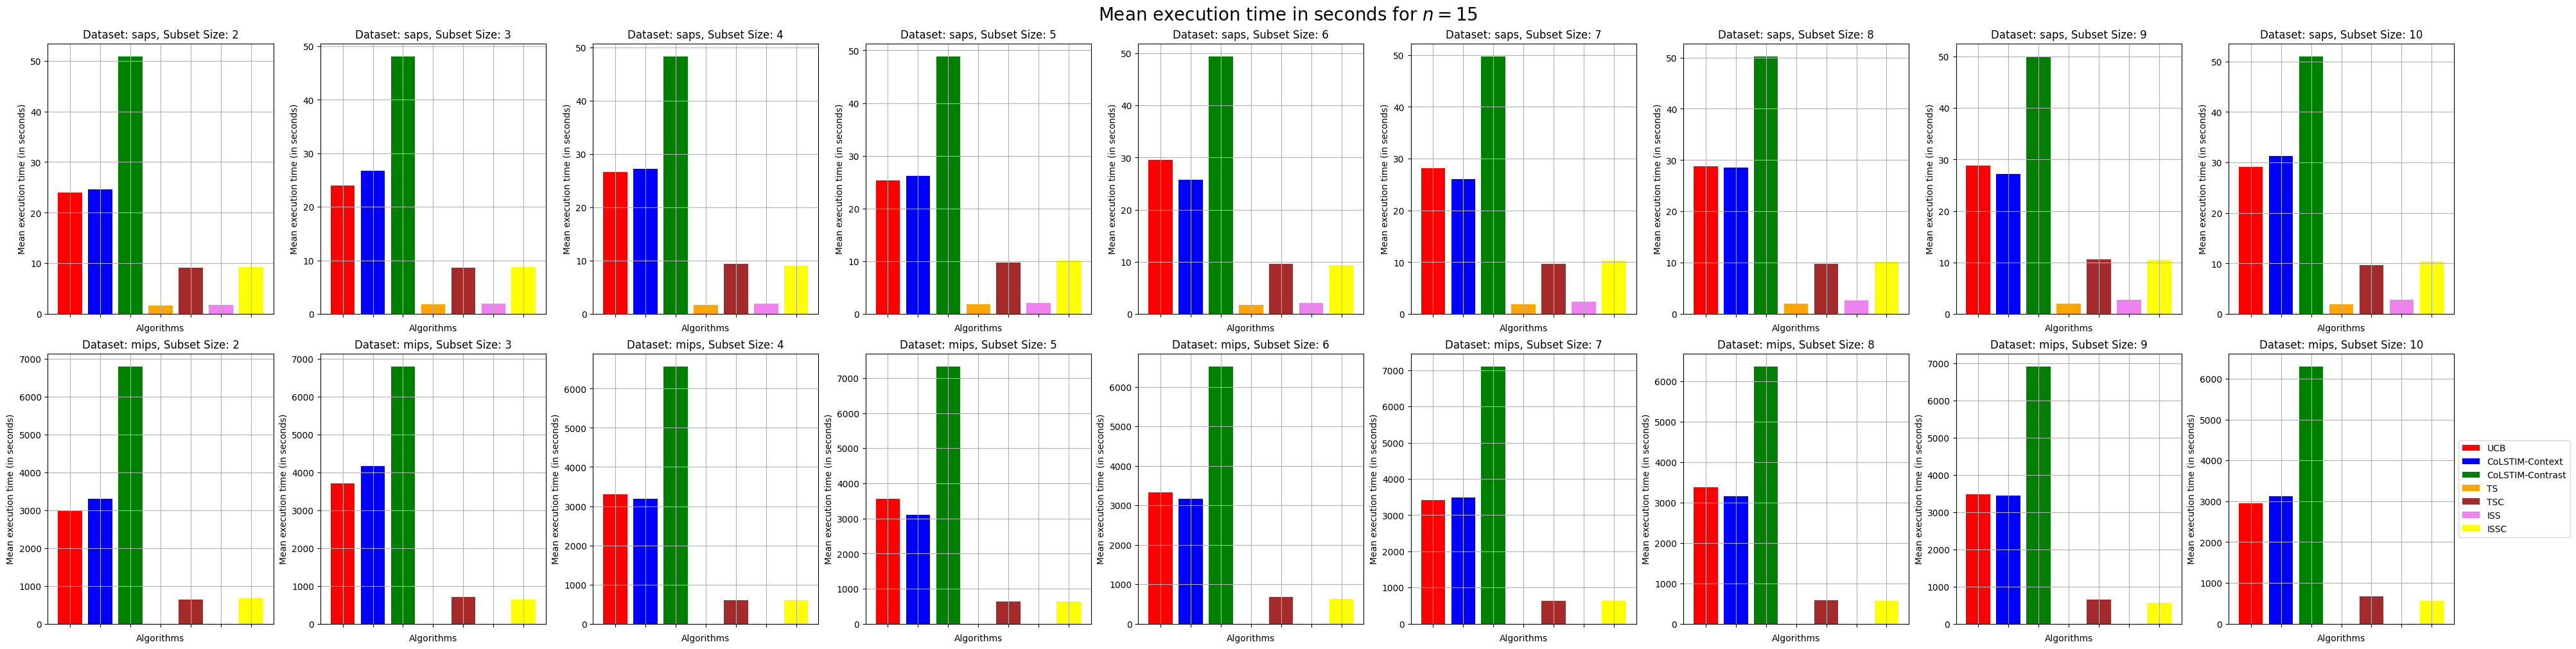

In [66]:
  
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
    "ThompsonSampling",
    "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    "IndependentSelfSparringContextual"
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory = "Noctua_2_Results\Execution_Time_Framework_v1"
plot_execution_times(algorithms, solvers, subset_size, colors, directory, num_arms=15)

### Execution times for TS, TSC, ISS and ISSC

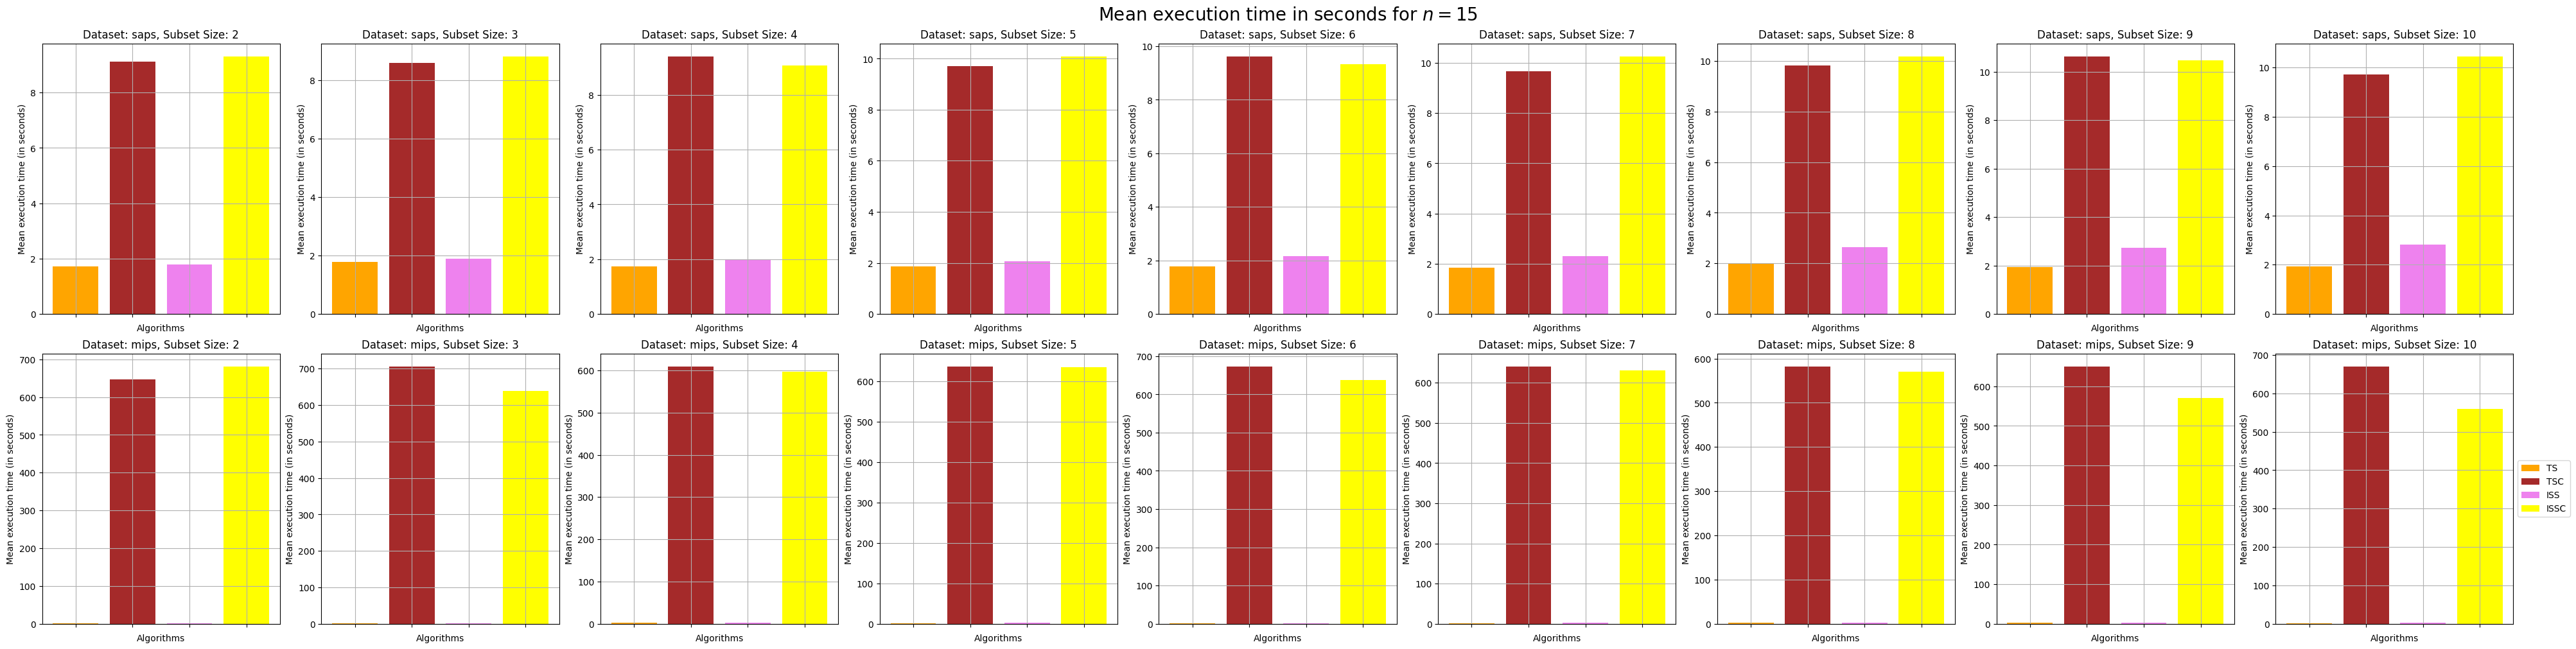

In [67]:
  
algorithms = [
    "ThompsonSampling",
    "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    "IndependentSelfSparringContextual"
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
colors = ["orange", "brown", "violet", "yellow"]
directory = "Noctua_2_Results\Execution_Time_Framework_v1"
plot_execution_times(algorithms, solvers, subset_size, colors, directory, num_arms=15)

### Execution times TSS and ISS

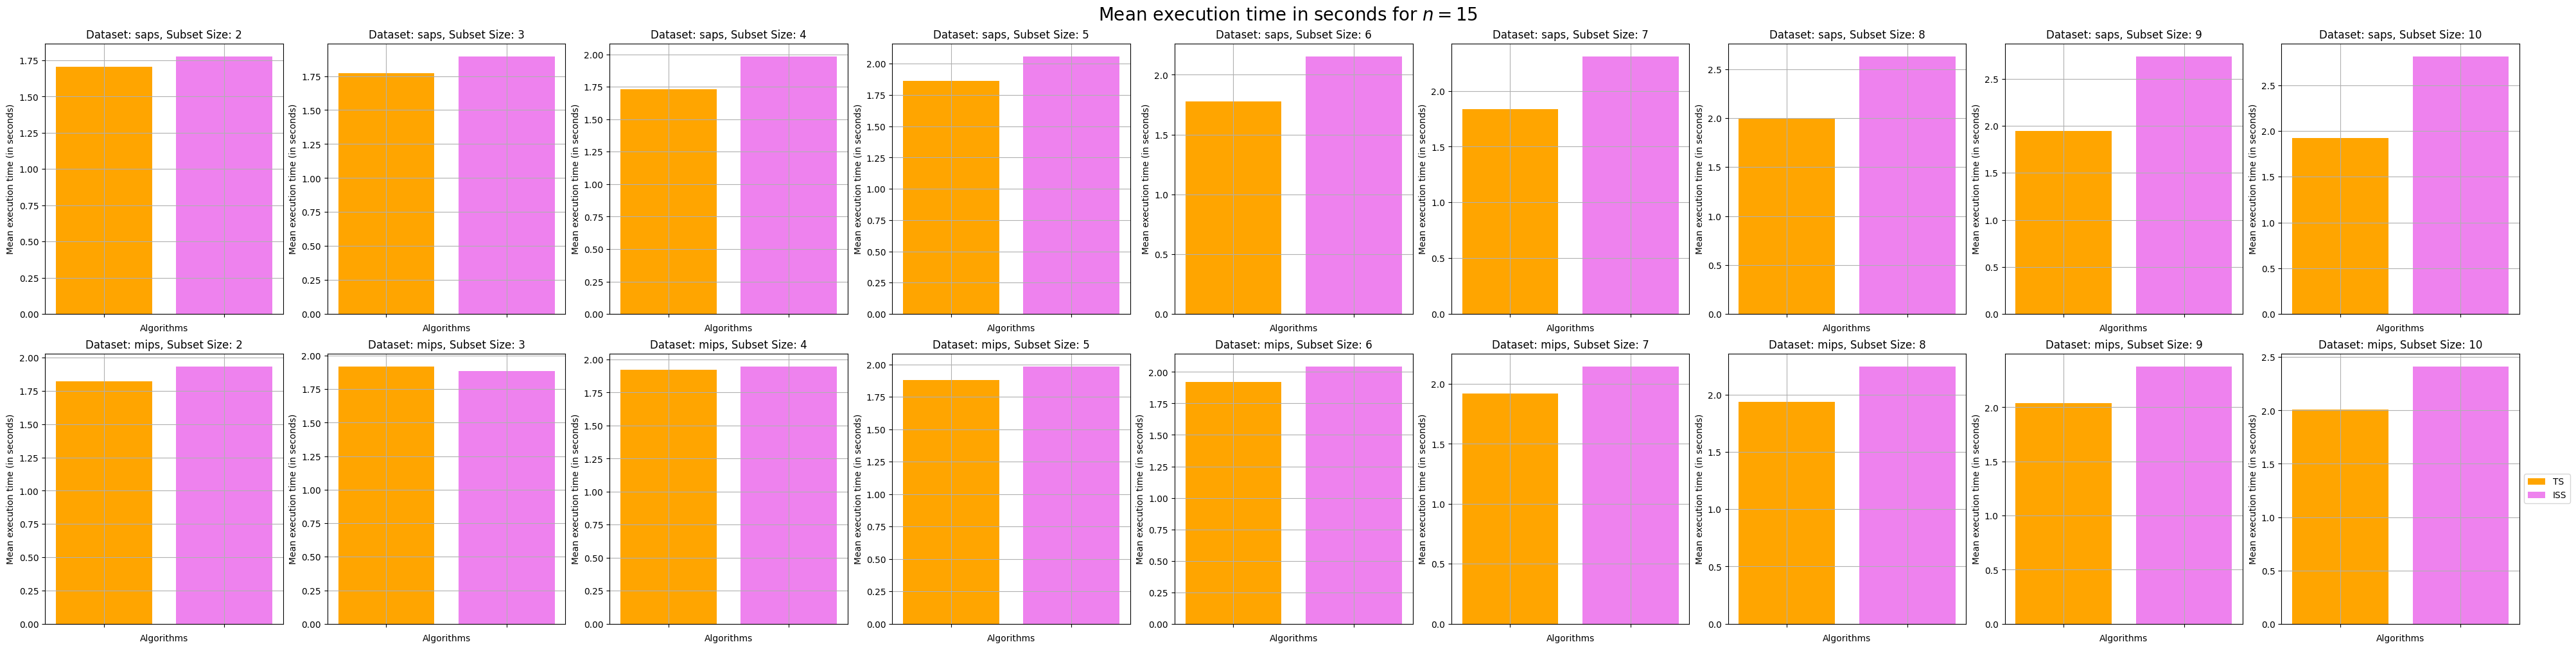

In [68]:
  
algorithms = [
    "ThompsonSampling",
    # "ThompsonSamplingContextual",
    "IndependentSelfSparring",
    # "IndependentSelfSparringContextual"
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
colors = ["orange", "violet"]
directory = "Noctua_2_Results\Execution_Time_Framework_v1"
plot_execution_times(algorithms, solvers, subset_size, colors, directory, num_arms=15)

# Framework v1 vs v2

In [69]:
import matplotlib.pyplot as plt
import numpy as np

from util.constants import Solver
from util.metrics import compute_cumulative_regret


def plot_regret_curves_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms):
    fig, ax = plt.subplots(len(solvers), len(subset_size), figsize=(40, 10), constrained_layout=True)
    for solver_index, solver in enumerate(solvers):
        for size_index, size in enumerate(subset_size):
            for index, algorithm in enumerate(algorithms):
                # try:
                label = f"{algorithm}"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast"
                regret_v1 = np.load(f"{directory_v1}//regret_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg_v1 = compute_cumulative_regret(regret_v1)
                ax[solver_index, size_index].plot(np.log(np.mean(cum_reg_v1, axis=0)), color=colors[index], label=label)
                # ax[solver_index, size_index].fill_between(
                #     range(len(cum_reg_v1[0])), 
                #     np.log(np.mean(cum_reg_v1, axis=0)-np.std(cum_reg_v1, axis=0)/np.sqrt(len(cum_reg_v1))), 
                #     np.log(np.mean(cum_reg_v1, axis=0)+np.std(cum_reg_v1, axis=0)/np.sqrt(len(cum_reg_v1))), 
                #     alpha=0.2
                # )
                # except:
                #     pass
                label = f"{algorithm} Explore-Exploit"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context Explore-Exploit"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast Explore-Exploit"
                regret_v2 = np.load(f"{directory_v2}//regret_{num_arms}_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg_v2 = compute_cumulative_regret(regret_v2)
                ax[solver_index, size_index].plot(np.log(np.mean(cum_reg_v2, axis=0)), color=colors[index + 3], label=label)
                # ax[solver_index, size_index].fill_between(
                #     range(len(cum_reg_v2[0])), 
                #     np.log(np.mean(cum_reg_v2, axis=0)-np.std(cum_reg_v2, axis=0)/np.sqrt(len(cum_reg_v2))), 
                #     np.log(np.mean(cum_reg_v2, axis=0)+np.std(cum_reg_v2, axis=0)/np.sqrt(len(cum_reg_v2))), 
                #     alpha=0.2
                # )
                # ax[solver_index, size_index].legend()
                ax[solver_index, size_index].set_ylabel("Logarithmic Cumulative Regret")
                ax[solver_index, size_index].set_xlabel("Time")
                ax[solver_index, size_index].set_title(f"Dataset: {solver}, Subset Size: {size}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))            
    fig.suptitle(f'Logarithmic Cumulative regrets for $n=${num_arms}', fontsize=20)
    plt.show()

    fig, ax = plt.subplots(len(solvers), len(subset_size), figsize=(40, 10), constrained_layout=True)
    for solver_index, solver in enumerate(solvers):
        for size_index, size in enumerate(subset_size):
            for index, algorithm in enumerate(algorithms):
                # try:
                label = f"{algorithm}"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast"
                regret_v1 = np.load(f"{directory_v1}//regret_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg_v1 = compute_cumulative_regret(regret_v1)
                ax[solver_index, size_index].plot(np.mean(cum_reg_v1, axis=0), color=colors[index], label=label)
                # ax[solver_index, size_index].fill_between(
                #     range(len(cum_reg_v1[0])), 
                #     np.mean(cum_reg_v1, axis=0)-np.std(cum_reg_v1, axis=0)/np.sqrt(len(cum_reg_v1)), 
                #     np.mean(cum_reg_v1, axis=0)+np.std(cum_reg_v1, axis=0)/np.sqrt(len(cum_reg_v1)), 
                #     alpha=0.2
                # )
                # except:
                #     pass
                label = f"{algorithm} Explore-Exploit"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context Explore-Exploit"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast Explore-Exploit"
                regret_v2 = np.load(f"{directory_v2}//regret_{num_arms}_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg_v2 = compute_cumulative_regret(regret_v2)
                ax[solver_index, size_index].plot(np.mean(cum_reg_v2, axis=0), color=colors[index + 3], label=label)
                # ax[solver_index, size_index].fill_between(
                #     range(len(cum_reg_v2[0])), 
                #     np.mean(cum_reg_v2, axis=0)-np.std(cum_reg_v2, axis=0)/np.sqrt(len(cum_reg_v2)), 
                #     np.mean(cum_reg_v2, axis=0)+np.std(cum_reg_v2, axis=0)/np.sqrt(len(cum_reg_v2)), 
                #     alpha=0.2
                # )
                # ax[solver_index, size_index].legend()
                ax[solver_index, size_index].set_ylabel("Cumulative Regret")
                ax[solver_index, size_index].set_xlabel("Time")
                ax[solver_index, size_index].set_title(f"Dataset: {solver}, Subset Size: {size}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(f'Cumulative regrets for $n=${num_arms}', fontsize=20)
    plt.show()  

def plot_execution_times_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms, single_solver=False):
    fig, ax = plt.subplots(len(solvers), len(subset_size), figsize=(40, 10), constrained_layout=True)
    for solver_index, solver in enumerate(solvers):
        for size_index, size in enumerate(subset_size):
            for index, (label, algorithm) in enumerate(algorithms.items()):
                # label = f"{algorithm}"
                # if label == "UCB":
                #     algorithm = "UCB"
                # if label == "CoLSTIM-Context":
                #     algorithm = "Colstim"
                # if label == "CoLSTIM-Contrast":
                #     algorithm = "Colstim_v2"
                # if algorithm == "Colstim":
                #     label = "CoLSTIM-Context"
                # if algorithm == "Colstim_v2":
                #     label = "CoLSTIM-Contrast"
                # if directory == directory_v1:
                try:
                    if num_arms == 20:
                        execution_time_v1 = np.load(f"{directory_v1}//execution_time_{algorithm}_{solver}_{size}.npy")
                    else:
                        execution_time_v1 = np.load(f"{directory_v1}//execution_time_{num_arms}_{algorithm}_{solver}_{size}.npy")
                    ax[solver_index, size_index].bar(x=algorithm, height=execution_time_v1.mean(), color=colors[index], label=label)
                except:
                    pass
                # if label == "CoLSTIM-Context Explore-Exploit":
                #     algorithm = "Colstim"
                # if label == "CoLSTIM-Contrast Explore-Exploit":
                #     algorithm = "Colstim_v2"
                # if label == "UCB Explore-Exploit":
                #     algorithm = "UCB"
                try:
                    execution_time_v2 = np.load(f"{directory_v2}//execution_time_{num_arms}_{algorithm}_{solver}_{size}.npy")
                    ax[solver_index, size_index].bar(x=algorithm, height=execution_time_v2.mean(), color=colors[index], label=label)
                except:
                    pass
                # label = f"{algorithm} Explore-Exploit"
                # if algorithm == "Colstim":
                #     label = "CoLSTIM-Context Explore-Exploit"
                # if algorithm == "Colstim_v2":
                #     label = "CoLSTIM-Contrast Explore-Exploit"
                # execution_time_v2 = np.load(f"{directory_v2}//execution_time_{num_arms}_{algorithm}_{solver}_{size}.npy")
                # ax[solver_index, size_index].bar(x=algorithm, height=execution_time_v2.mean(), color=colors[index + 3], label=label)
                # ax[solver_index, size_index].legend()#loc='center left', bbox_to_anchor=(1, 0.5))
                ax[solver_index, size_index].set_ylabel("Mean execution time (in seconds)")
                ax[solver_index, size_index].set_xlabel("Algorithms")
                ax[solver_index, size_index].set_xticklabels([])
                ax[solver_index, size_index].set_title(f"Dataset: {solver}, Subset Size: {size}")
            ax[solver_index, size_index].grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(f'Mean execution time in seconds for $n=${num_arms}', fontsize=20)
    plt.show()

In [99]:
def plot_regret_curves_single_solver_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms):
    fig, ax = plt.subplots(len(solvers), len(subset_size), figsize=(15, 6), constrained_layout=True)
    for solver_index, solver in enumerate(solvers):
        for size_index, size in enumerate(subset_size):
            for index, algorithm in enumerate(algorithms):
                # try:
                label = f"{algorithm}"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast"
                regret_v1 = np.load(f"{directory_v1}//regret_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg_v1 = compute_cumulative_regret(regret_v1)
                ax[size_index].plot(np.log(np.mean(cum_reg_v1, axis=0)), color=colors[index], label=label)
                # ax[size_index].fill_between(
                #     range(len(cum_reg_v1[0])), 
                #     np.log(np.mean(cum_reg_v1, axis=0)-np.std(cum_reg_v1, axis=0)/np.sqrt(len(cum_reg_v1))), 
                #     np.log(np.mean(cum_reg_v1, axis=0)+np.std(cum_reg_v1, axis=0)/np.sqrt(len(cum_reg_v1))), 
                #     alpha=0.2
                # )
                # except:
                #     pass
                label = f"{algorithm} Explore-Exploit"
                if algorithm == "Colstim":
                    label = "CoLSTIM-Context Explore-Exploit"
                if algorithm == "Colstim_v2":
                    label = "CoLSTIM-Contrast Explore-Exploit"
                regret_v2 = np.load(f"{directory_v2}//regret_{num_arms}_{algorithm}_{solver}_{size}.npy", allow_pickle=True)
                cum_reg_v2 = compute_cumulative_regret(regret_v2)
                ax[size_index].plot(np.log(np.mean(cum_reg_v2, axis=0)), color=colors[index + 3], label=label)
                # ax[size_index].fill_between(
                #     range(len(cum_reg_v2[0])), 
                #     np.log(np.mean(cum_reg_v2, axis=0)-np.std(cum_reg_v2, axis=0)/np.sqrt(len(cum_reg_v2))), 
                #     np.log(np.mean(cum_reg_v2, axis=0)+np.std(cum_reg_v2, axis=0)/np.sqrt(len(cum_reg_v2))), 
                #     alpha=0.2
                # )
                # ax[size_index].legend()
                ax[size_index].set_ylabel("Logarithmic Cumulative Regret")
                ax[size_index].set_xlabel("Time")
                ax[size_index].set_title(f"Dataset: {solver}, Subset Size: {size}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))            
    fig.suptitle(f'Logarithmic Cumulative regrets for $n=${num_arms}', fontsize=20)
    plt.show()

## Plot regrets with N = 20 (Final)

C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\1025165480.py:21: RuntimeWarning: divide by zero encountered in log
  ax[solver_index, size_index].plot(np.log(np.mean(cum_reg_v1, axis=0)), color=colors[index], label=label)
C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\1025165480.py:37: RuntimeWarning: divide by zero encountered in log
  ax[solver_index, size_index].plot(np.log(np.mean(cum_reg_v2, axis=0)), color=colors[index + 3], label=label)
C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\1025165480.py:37: RuntimeWarning: invalid value encountered in log
  ax[solver_index, size_index].plot(np.log(np.mean(cum_reg_v2, axis=0)), color=colors[index + 3], label=label)


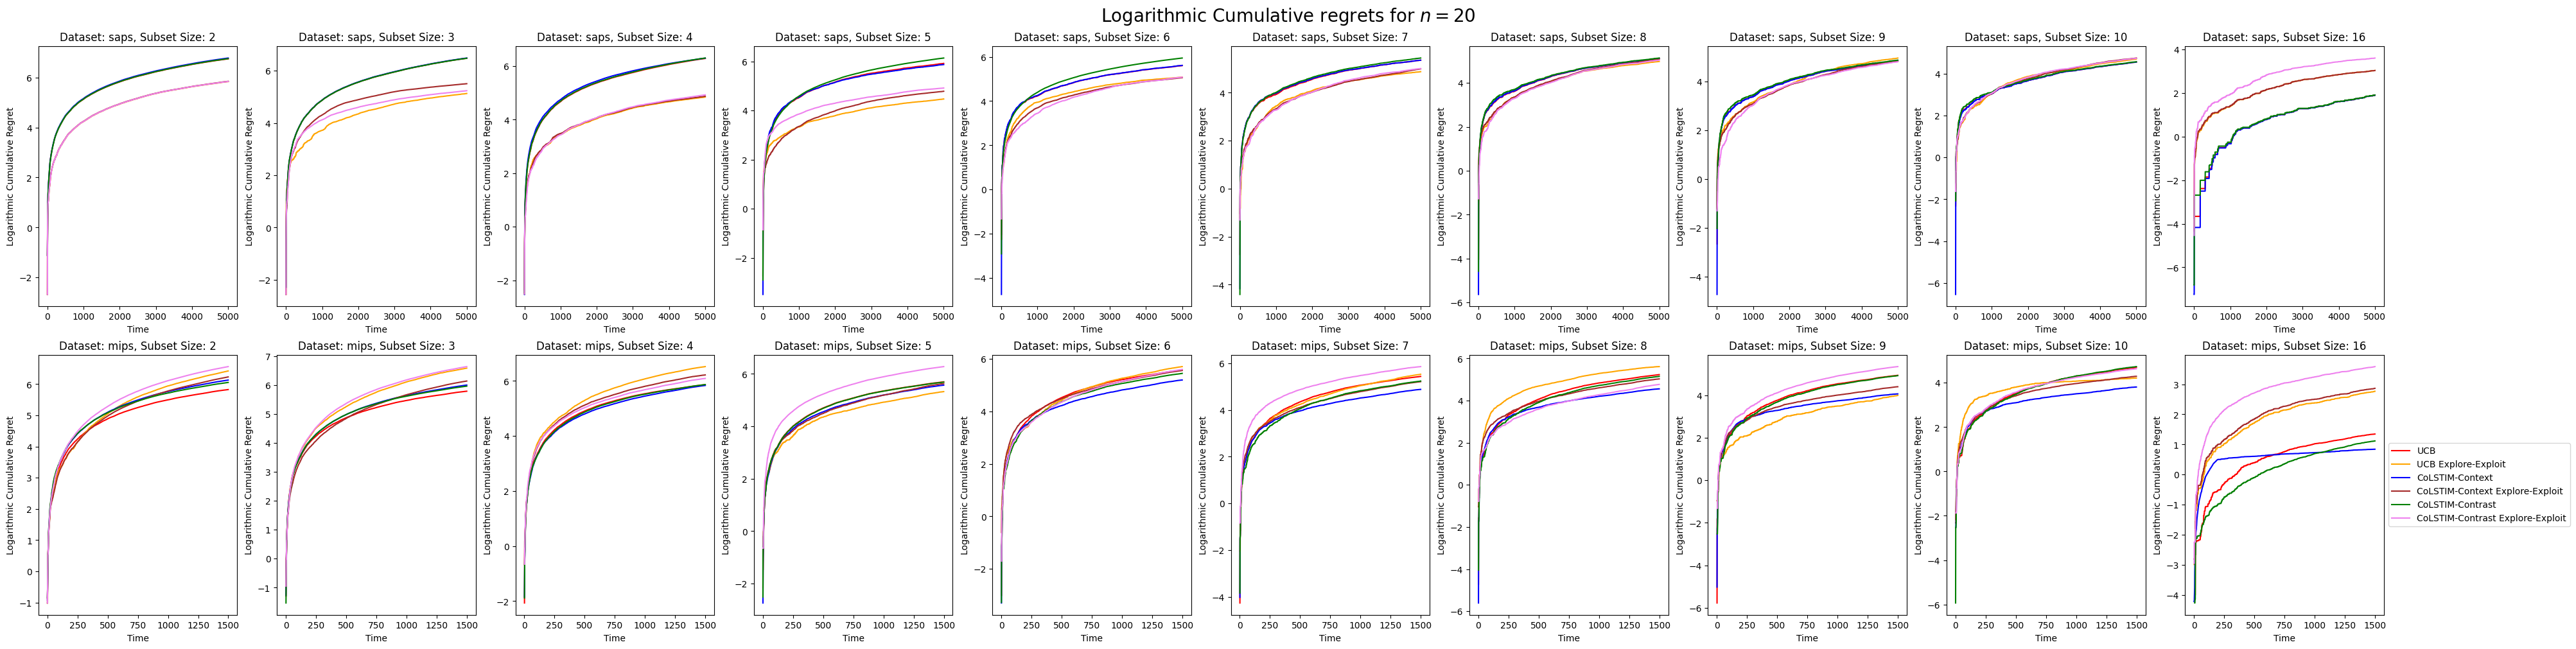

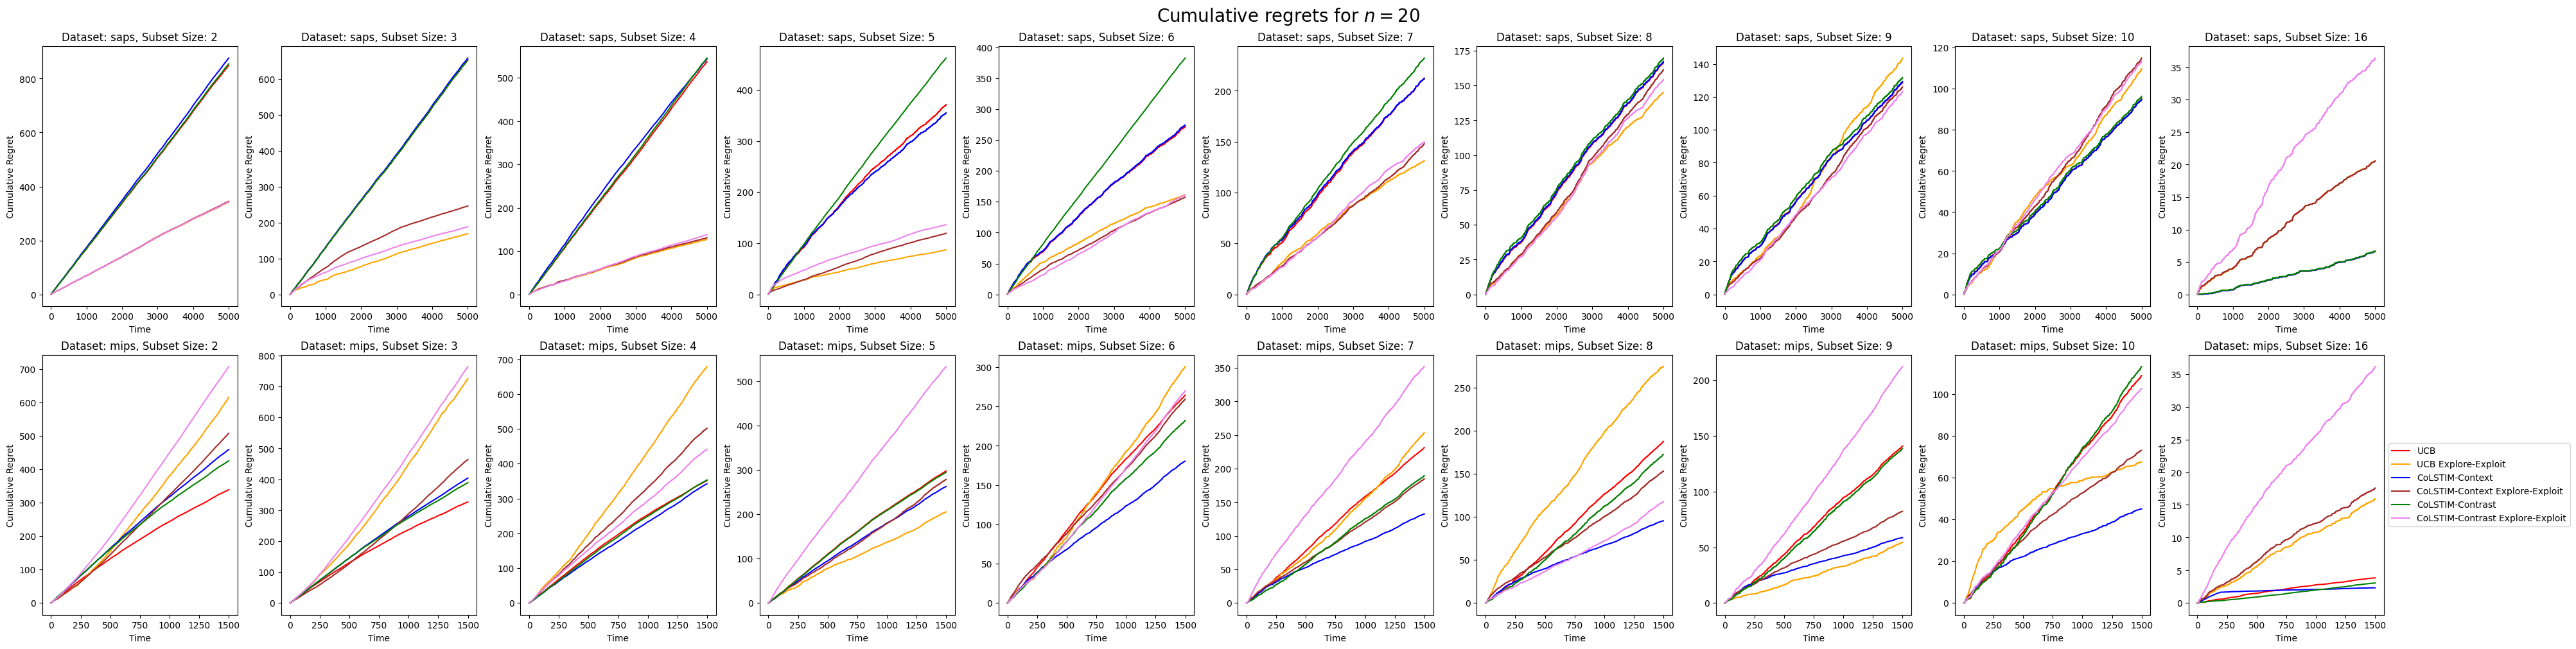

In [58]:
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 16]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory_v1 = "Noctua_2_Results\Regret_Framework_v1"
directory_v2 = "Noctua_2_Results\Framework_v2\Regret"
plot_regret_curves_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms=20)

## Plot log cumul regret for MIPS, N = 20, $k = \{9, 10, 16\}$

C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\2839677286.py:14: RuntimeWarning: divide by zero encountered in log
  ax[size_index].plot(np.log(np.mean(cum_reg_v1, axis=0)), color=colors[index], label=label)
C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\2839677286.py:30: RuntimeWarning: divide by zero encountered in log
  ax[size_index].plot(np.log(np.mean(cum_reg_v2, axis=0)), color=colors[index + 3], label=label)


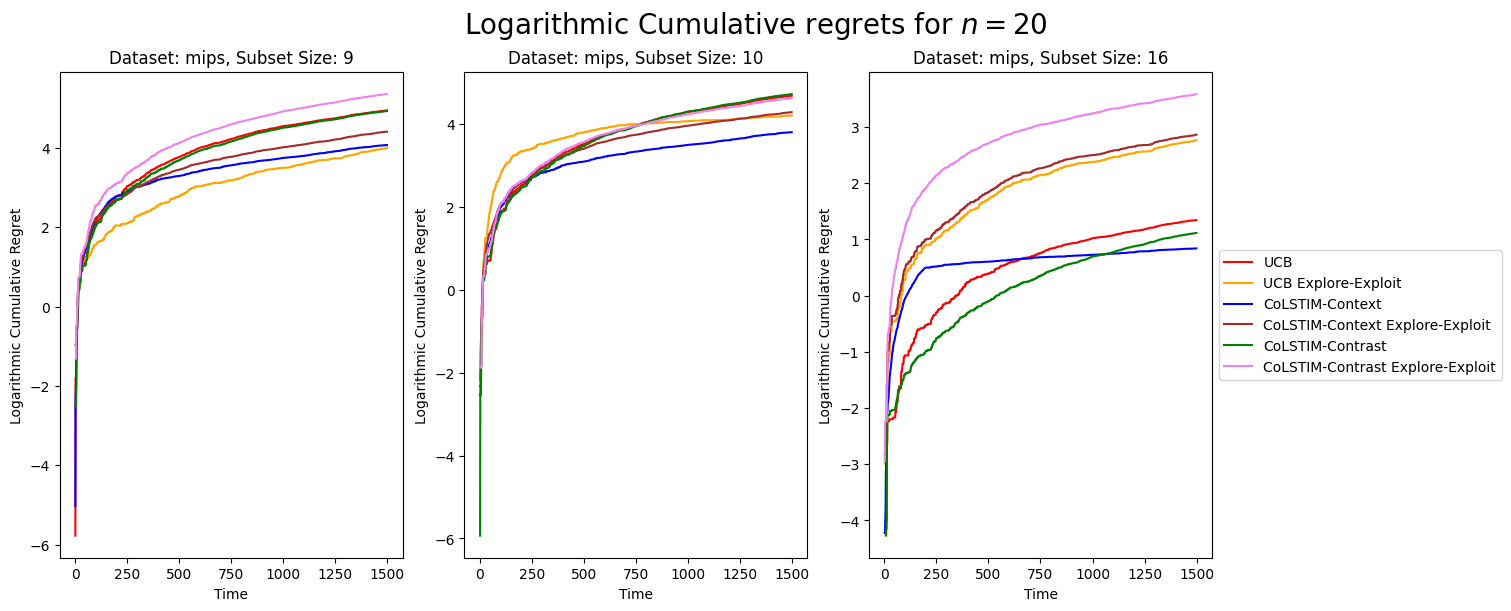

In [100]:
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
]
solvers = ["mips"]
subset_size = [9, 10, 16]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory_v1 = "Noctua_2_Results\Regret_Framework_v1"
directory_v2 = "Noctua_2_Results\Framework_v2\Regret"
plot_regret_curves_single_solver_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms=20)

## Plot execution times with N = 20 (final)

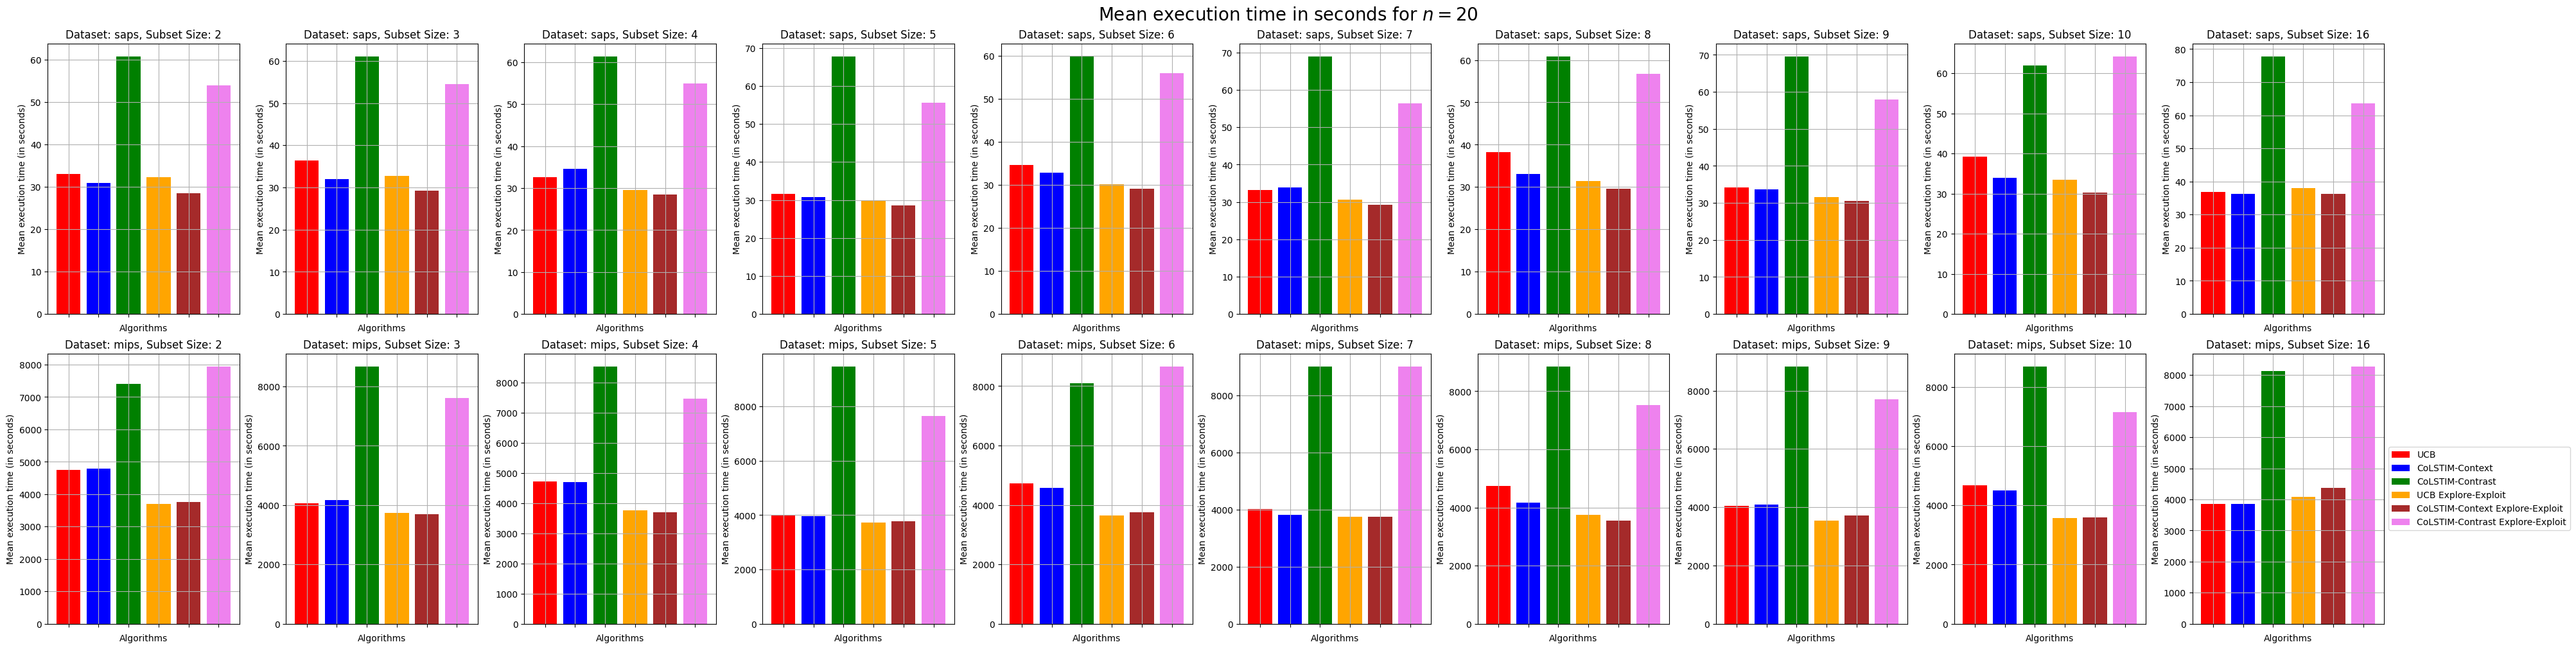

In [70]:
algorithms = {
    "UCB" : "UCB",
    "CoLSTIM-Context" : "Colstim",
    "CoLSTIM-Contrast": "Colstim_v2",
    "UCB Explore-Exploit" : "UCBExploreExploit",
    "CoLSTIM-Context Explore-Exploit" : "ColstimContextExploreExploit",
    "CoLSTIM-Contrast Explore-Exploit" : "ColstimContrastExploreExploit"
}
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 16]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory_v1 = "Noctua_2_Results\Execution_Time_Framework_v1"
directory_v2 = "Noctua_2_Results\Framework_v2\Execution_Time"
plot_execution_times_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms=20)

## Plot regrets with N = 15 (Final)

C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\361855551.py:21: RuntimeWarning: divide by zero encountered in log
  ax[solver_index, size_index].plot(np.log(np.mean(cum_reg_v1, axis=0)), color=colors[index], label=label)
C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\361855551.py:37: RuntimeWarning: divide by zero encountered in log
  ax[solver_index, size_index].plot(np.log(np.mean(cum_reg_v2, axis=0)), color=colors[index + 3], label=label)


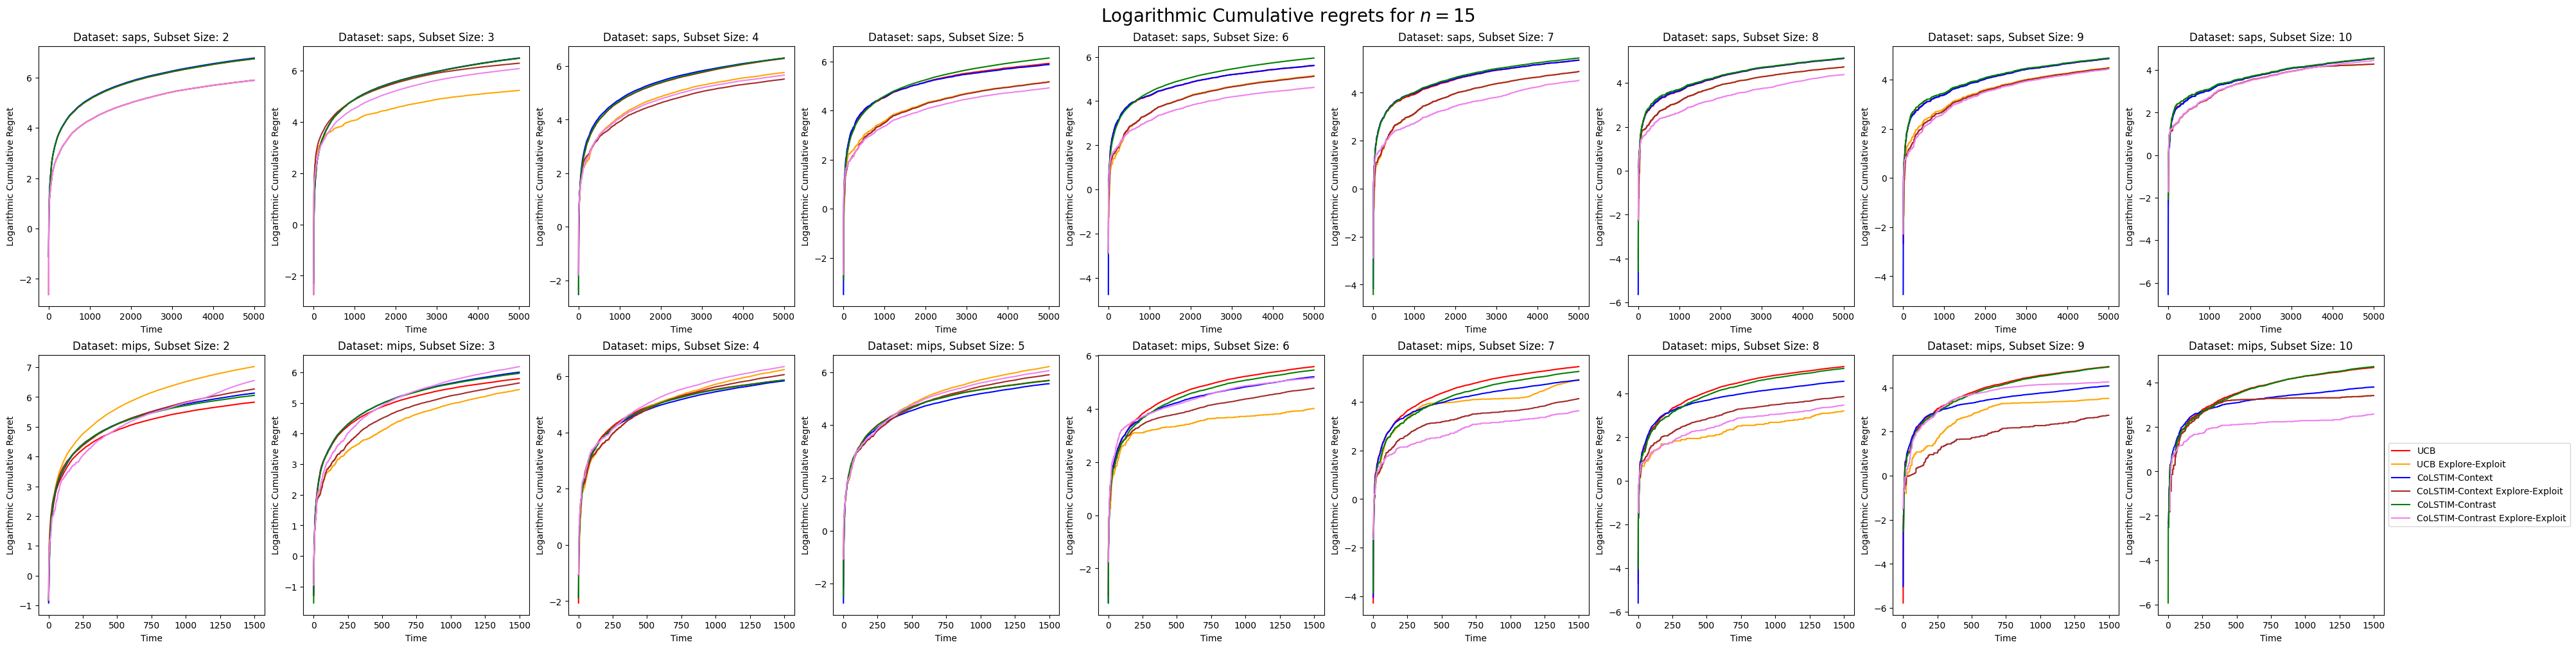

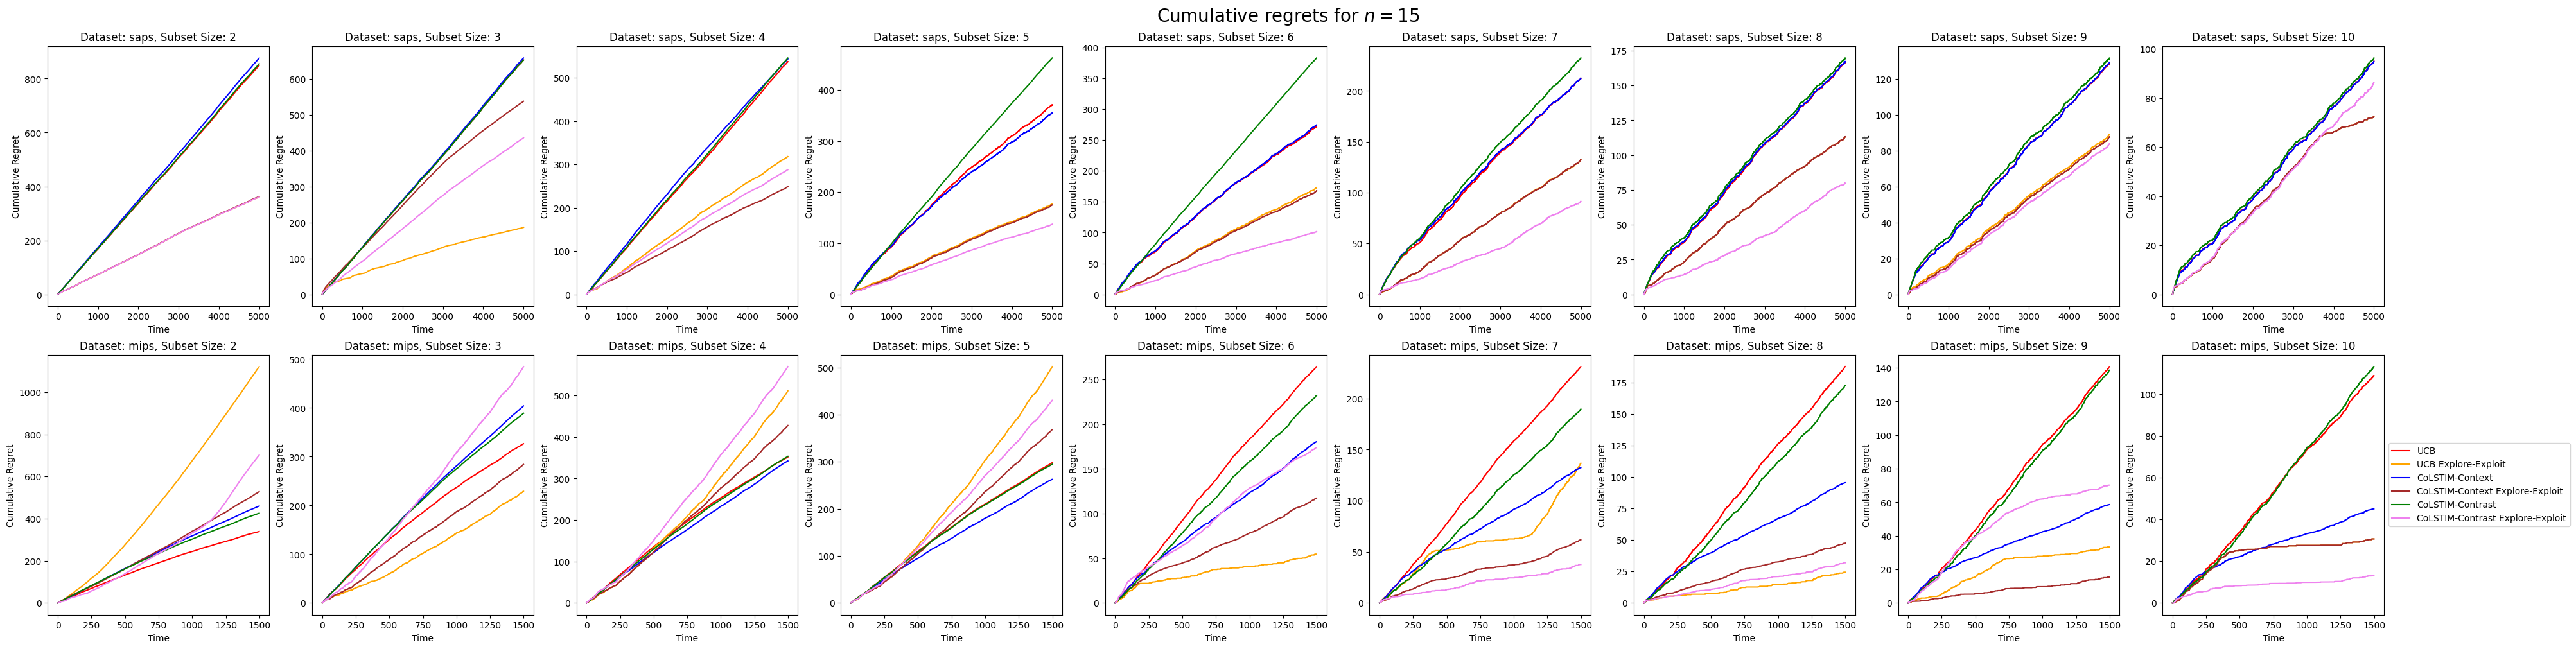

In [71]:
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
]
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory_v1 = "Noctua_2_Results\Regret_Framework_v1"
directory_v2 = "Noctua_2_Results\Framework_v2\Regret"
plot_regret_curves_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms=15)

## Plot log cumul regret for MIPS, N = 15, $k = \{8, 9, 10\}$

C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\2839677286.py:14: RuntimeWarning: divide by zero encountered in log
  ax[size_index].plot(np.log(np.mean(cum_reg_v1, axis=0)), color=colors[index], label=label)
C:\Users\sshiv\AppData\Local\Temp\ipykernel_19988\2839677286.py:30: RuntimeWarning: divide by zero encountered in log
  ax[size_index].plot(np.log(np.mean(cum_reg_v2, axis=0)), color=colors[index + 3], label=label)


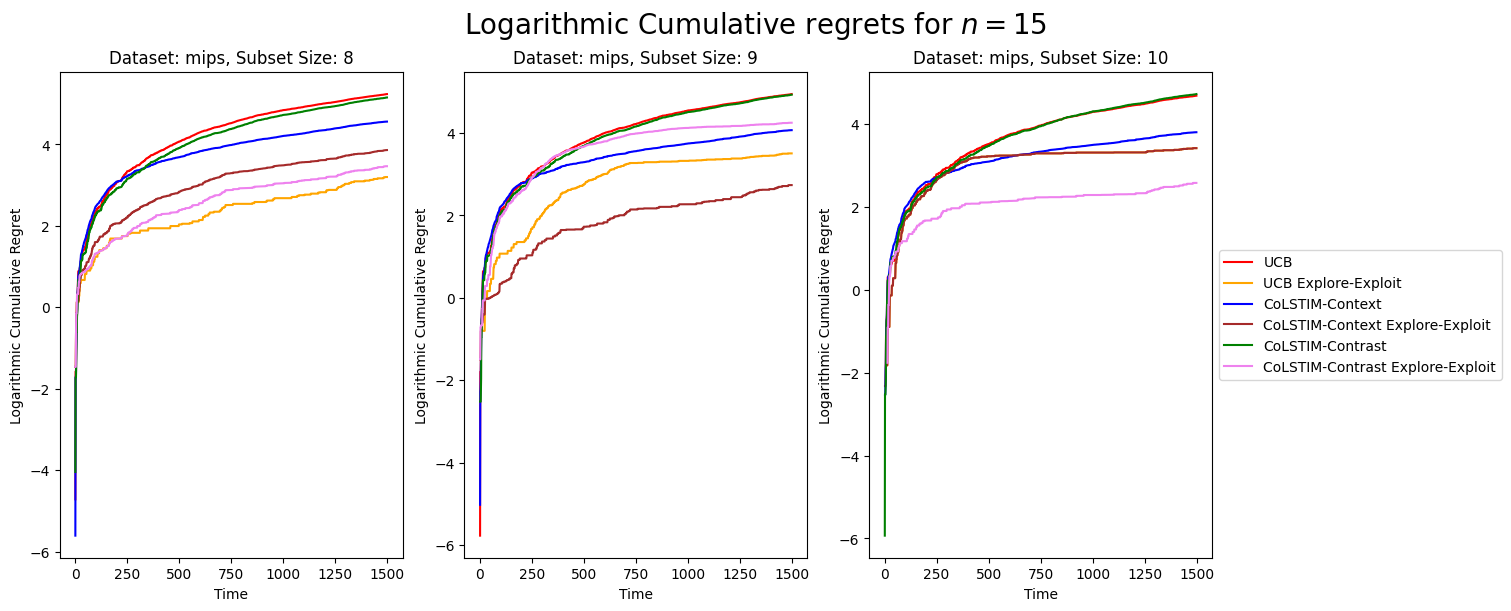

In [101]:
algorithms = [
    "UCB",
    "Colstim",
    "Colstim_v2",
]
solvers = ["mips"]
subset_size = [8, 9, 10]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory_v1 = "Noctua_2_Results\Regret_Framework_v1"
directory_v2 = "Noctua_2_Results\Framework_v2\Regret"
plot_regret_curves_single_solver_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms=15)

## Plot execution times with N = 15 (final)

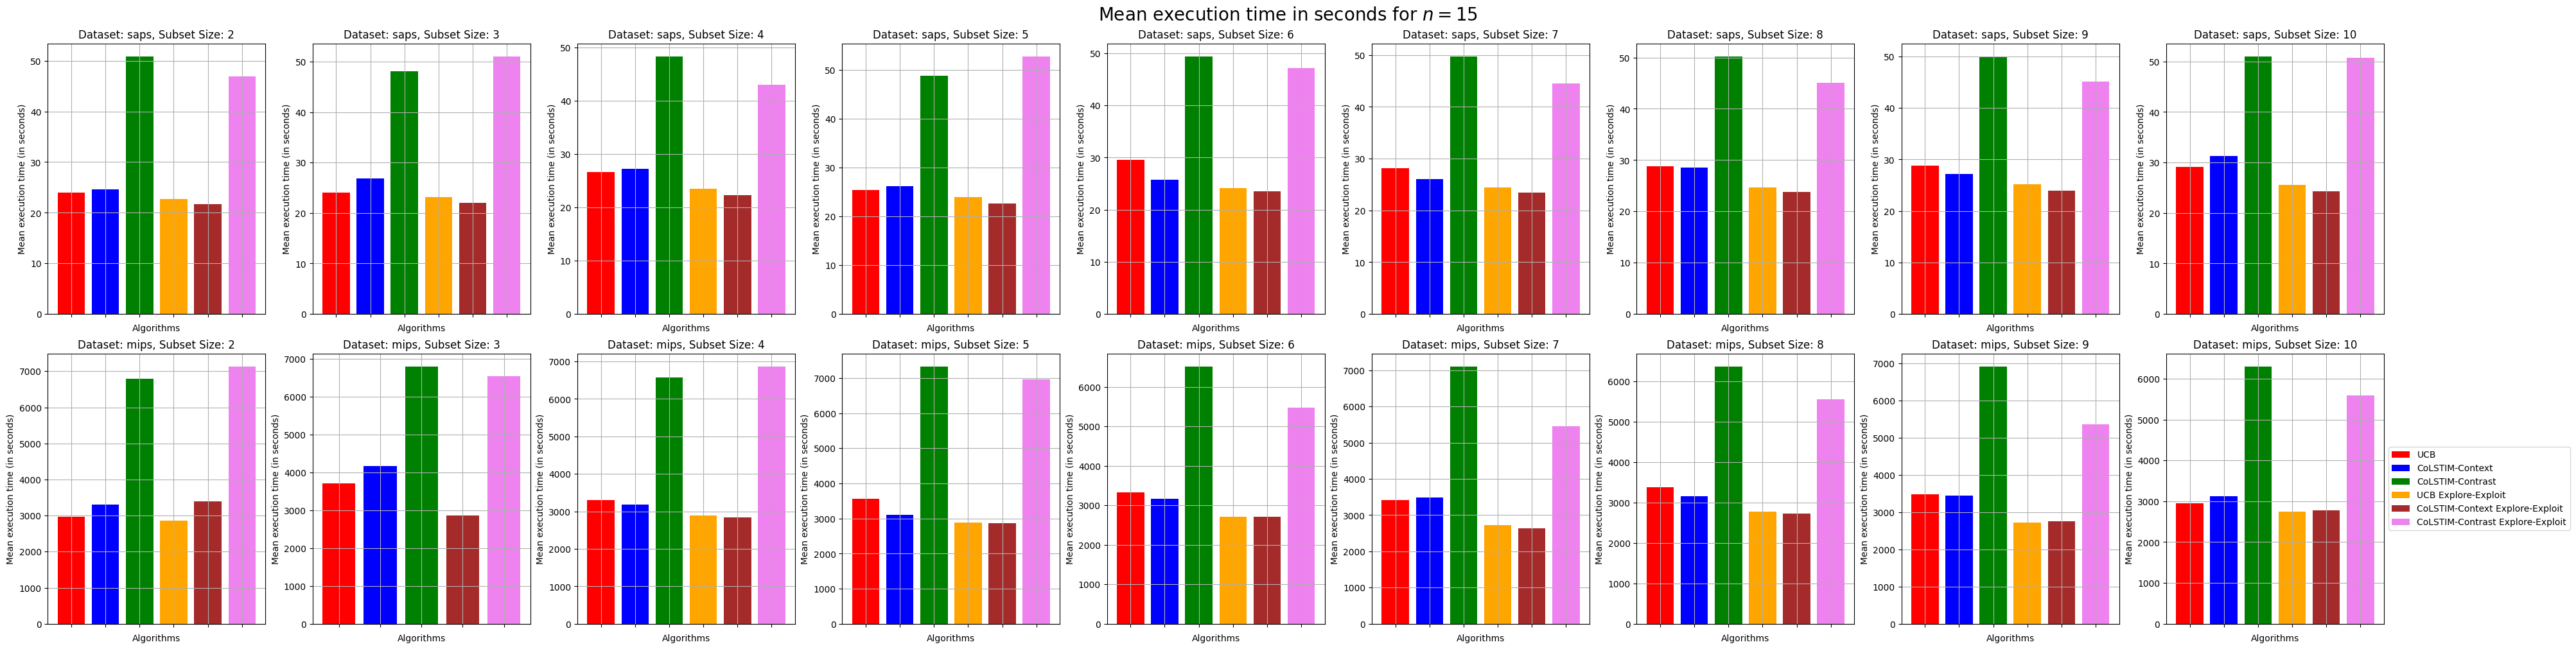

In [72]:
algorithms = {
    "UCB" : "UCB",
    "CoLSTIM-Context" : "Colstim",
    "CoLSTIM-Contrast": "Colstim_v2",
    "UCB Explore-Exploit" : "UCBExploreExploit",
    "CoLSTIM-Context Explore-Exploit" : "ColstimContextExploreExploit",
    "CoLSTIM-Contrast Explore-Exploit" : "ColstimContrastExploreExploit"
}
solvers = [solver.value for solver in Solver]
subset_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
colors = ["red", "blue", "green", "orange", "brown", "violet", "yellow"]
directory_v1 = "Noctua_2_Results\Execution_Time_Framework_v1"
directory_v2 = "Noctua_2_Results\Framework_v2\Execution_Time"
plot_execution_times_v1_v2(algorithms, solvers, subset_size, colors, directory_v1, directory_v2, num_arms=15)